# Spatial Patterns of Chlolorophyll-a at an Australian Marine Park

**What does this notebook do?** 
This notebook demonstrates how to generate and plot the spatial patterns of Chlorophyll-a (CHL) mean statistics at various temporal resolutions for a Australian Marine Park, and to determine their trends.

**Requirements** 
You need to run the following commands from the command line prior to launching jupyter notebook from the same terminal so that the required libraries and paths are set.

module use /g/data/v10/public/modules/modulefiles

module load dea

If you find an error or bug in this notebook, please either create an 'Issue' in the Github repository, or fix it yourself and create a 'Pull' request to contribute the updated notebook back into the repository (See the repository README for instructions on creating a Pull request).

**Date:** last updated 30th, Jan, 2020

**Author:** Zhi Huang

**Import modules**

In [1]:
from datacube import Datacube
from datacube.storage.masking import mask_invalid_data
%matplotlib inline
import fiona
from shapely import geometry
from datacube.utils import geometry
import matplotlib.pyplot as plt
import geopandas as gpd
from rasterstats import zonal_stats
from affine import Affine
from datacube.helpers import write_geotiff
import pandas as pd
from datetime import datetime
import rasterio.features
import numpy as np

**Specify a development database to connect to. It is on a different database server agdcstaging-db.nci.org.au, which means that your ~/.pgpass file will need to specify a password to connect to it as well.**

In [2]:
dc = Datacube(config='/g/data/u46/users/dsg547/modis_oc.conf')

**The only product in this database is the daily ocean colour data between July 2002 and July 2019.**

In [3]:
dc.list_products()

,name,description,instrument,label,product_type,creation_time,lat,time,platform,format,lon,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,
5,modis_oc_1d,MODIS Ocean Cover Daily,None,None,modis_oc_1d,None,None,None,MODIS,None,None,EPSG:4326,"(-0.01, 0.01)",None,"(latitude, longitude)"


**plot the AMP shapefile**

PROJCS["GDA94 / Australian Albers",GEOGCS["GDA94",DATUM["Geocentric_Datum_of_Australia_1994",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6283"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4283"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["standard_parallel_1",-18],PARAMETER["standard_parallel_2",-36],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",132],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3577"]]


<Figure size 432x288 with 0 Axes>

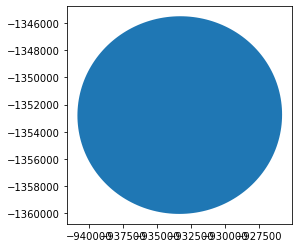

In [3]:
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'

#open the polygon
with fiona.open(poly_path) as shapes:
        crs = geometry.CRS(shapes.crs_wkt)
        first_geometry = next(iter(shapes))['geometry']
        geom = geometry.Geometry(first_geometry, crs=crs)

print(crs)
#plot polygon to check it looks ok
plt.clf()
shape_plot = gpd.read_file(poly_path)
shape_plot.plot()

plt.show()


PROJCS["GDA94 / Australian Albers",GEOGCS["GDA94",DATUM["Geocentric_Datum_of_Australia_1994",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6283"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4283"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["standard_parallel_1",-18],PARAMETER["standard_parallel_2",-36],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",132],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3577"]]


TypeError: 'ShapeRecord' object is not callable

<Figure size 432x288 with 0 Axes>

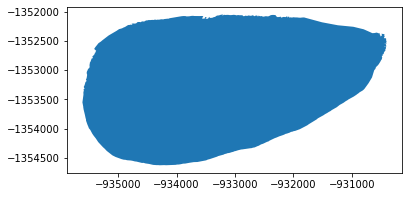

In [54]:
from osgeo import ogr
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island_island.shp'

#open the polygon
with fiona.open(poly_path) as shapes:
        crs = geometry.CRS(shapes.crs_wkt)
        first_geometry = next(iter(shapes))['geometry']
        geom = geometry.Geometry(first_geometry, crs=crs)
print(crs)

#plot polygon to check it looks ok
plt.clf()
shape_plot = gpd.read_file(poly_path)
shape_plot.plot()
shape(srBuffer)
plt.show()


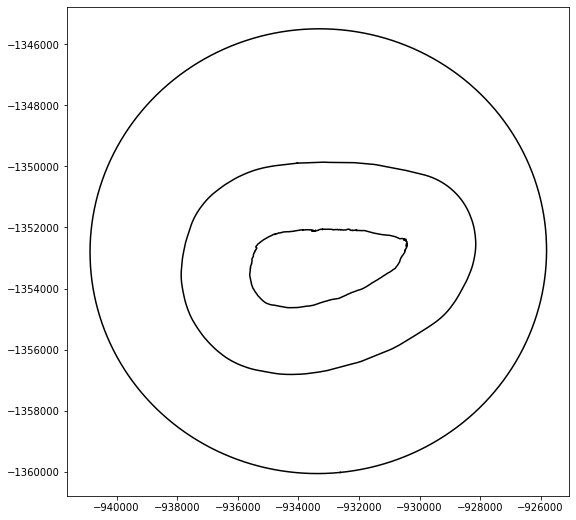

In [52]:
import shapefile as shpf
from shapely.geometry import shape, mapping

AMP_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
reef_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island_island.shp'
reefBuffer_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island_island_buffer20km.shp'

CI = shpf.Reader(AMP_path)
CI_I = shpf.Reader(reef_path)
CI_IB = shpf.Reader(reefBuffer_path)
plt.figure(figsize=(9,9))
shape(srBuffer)
for shape in CI.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')

for shape in CI_I.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
for shape in CI_IB.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')

AttributeError: 'Geometry' object has no attribute 'plot'

<Figure size 648x648 with 0 Axes>

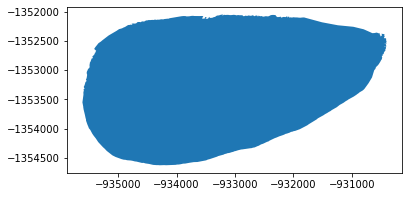

In [64]:
import ogr
import matplotlib.patches as patches
#from matplotlib.patches import polygon
from matplotlib.collections import PatchCollection
from shapely.geometry import shape, mapping
import fiona
plt.figure(figsize=(9,9))
reef_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island_island.shp'
with fiona.open(reef_path) as shapes:
        crs = geometry.CRS(shapes.crs_wkt)
        x = next(iter(shapes))
        first_geometry = next(iter(shapes))['geometry']
        #print(first_geometry)
        geom1 = geometry.Geometry(first_geometry, crs=crs)

srBuffer = geom1.buffer(2000)        


#plot polygon to check it looks ok
plt.clf()
shape_plot = gpd.read_file(poly_path)
shape_plot.plot()
shape_plot1 = srBuffer
shape_plot1.plot()
plt.show()

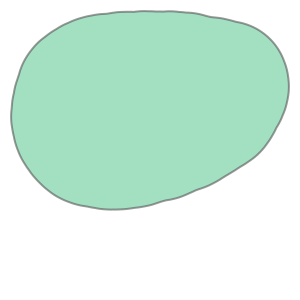

In [61]:
shape(srBuffer)

In [65]:
srBuffer?

In [41]:
geometry.Geometry.buffer?

In [47]:
from shapely.geometry import shape, mapping
import fiona

AMP_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
reef_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island_island.shp'
reefBuffer_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island_island_buffer20km.shp'
##open the polygon
with fiona.open(AMP_path) as shapes:
        crs = geometry.CRS(shapes.crs_wkt)
        x = next(iter(shapes))
        first_geometry = next(iter(shapes))['geometry']
        geom1 = geometry.Geometry(first_geometry, crs=crs)
print(type(first_geometry))
with fiona.open(reef_path) as shapes:
        crs = geometry.CRS(shapes.crs_wkt)
        first_geometry = next(iter(shapes))['geometry']
        geom2 = geometry.Geometry(first_geometry, crs=crs)

a = shape(geom1)
b = shape(geom2.buffer(2000))
newGeom = a.difference(b) # erase b from a
print(type(newGeom))
print(type(geom1))
newGeom1 = mapping(newGeom)
print(type(newGeom1))
newGeom2 = geometry.Geometry(newGeom1, crs=crs)
print(type(newGeom2))

<class 'dict'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'datacube.utils.geometry._base.Geometry'>
<class 'dict'>
<class 'datacube.utils.geometry._base.Geometry'>


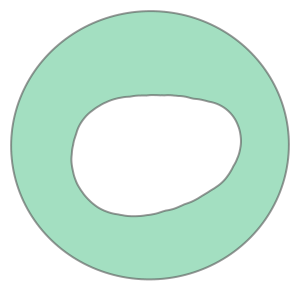

In [49]:
shape(newGeom2)

**load chl_oc3 data for the AMP**

In [7]:
query = {'geopolygon': newGeom2,
         'output_crs': 'EPSG:3577',
         'resolution': (-1300,1300)
         }

In [8]:
time1 = datetime.now()
data = dc.load(product='modis_oc_1d', measurements=(['chl_oc3']), **query)
time2 = datetime.now()
diff = time2 - time1
print('took',diff, 'to finish')

took 0:18:27.173344 to finish


In [9]:
data

<xarray.Dataset>
Dimensions:  (time: 6214, x: 12, y: 13)
Coordinates:
  * time     (time) datetime64[ns] 2002-07-04T11:59:59.999999 ... 2019-07-22T11:59:59.999999
  * y        (y) float64 -1.345e+06 -1.346e+06 ... -1.359e+06 -1.36e+06
  * x        (x) float64 -9.406e+05 -9.392e+05 ... -9.276e+05 -9.262e+05
Data variables:
    chl_oc3  (time, y, x) float32 0.34175664 0.3226104 ... -999.0 -999.0
Attributes:
    crs:      EPSG:3577

**create a mask for the area covered by the AMP polygon**

In [9]:
mask = rasterio.features.geometry_mask([newGeom2.to_crs(data.geobox.crs) for geoms in [newGeom2]],
                                           out_shape=data.geobox.shape,
                                           transform=data.geobox.affine,
                                           all_touched=False,
                                           invert=True)
data = data.where(mask)

In [10]:
data = mask_invalid_data(data)

In [11]:
# note the time dimension: 6214
data

<xarray.Dataset>
Dimensions:  (time: 6214, x: 12, y: 13)
Coordinates:
  * time     (time) datetime64[ns] 2002-07-04T11:59:59.999999 ... 2019-07-22T11:59:59.999999
  * y        (y) float64 -1.345e+06 -1.346e+06 ... -1.359e+06 -1.36e+06
  * x        (x) float64 -9.406e+05 -9.392e+05 ... -9.276e+05 -9.262e+05
Data variables:
    chl_oc3  (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    crs:      EPSG:3577

In [12]:
data1 = data.copy(deep=True)
x = data1.chl_oc3
# the chl values greater than 5.0 mg/m3 are likely over-estimated; these values are reset to 5.0 mg/m3
x = x.where((x < 5) | (np.isnan(x)),5)
data1['chl_oc3'] = x

PROJCS["GDA94 / Australian Albers",GEOGCS["GDA94",DATUM["Geocentric_Datum_of_Australia_1994",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6283"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4283"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["standard_parallel_1",-18],PARAMETER["standard_parallel_2",-36],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",132],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3577"]]


<Figure size 432x288 with 0 Axes>

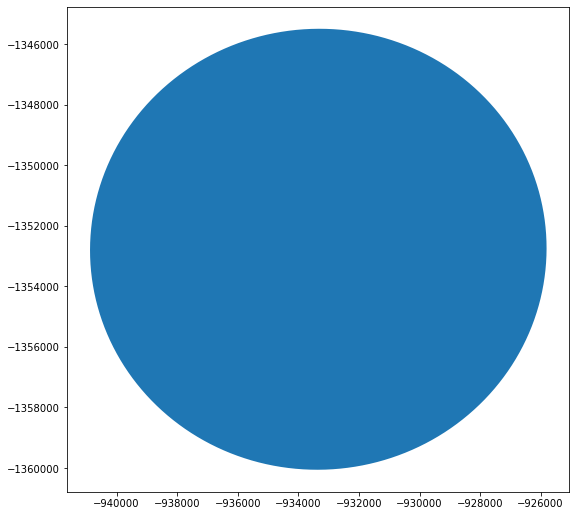

In [76]:
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'

#open the polygon
with fiona.open(poly_path) as shapes:
        crs = geometry.CRS(shapes.crs_wkt)
        first_geometry = next(iter(shapes))['geometry']
        geom = geometry.Geometry(first_geometry, crs=crs)

print(crs)
#plot polygon to check it looks ok
plt.clf()
shape_plot = gpd.read_file(poly_path)
shape_plot.plot(figsize=(9,9))

plt.show()

TypeError: 'ShapeRecord' object is not callable

<Figure size 648x648 with 0 Axes>

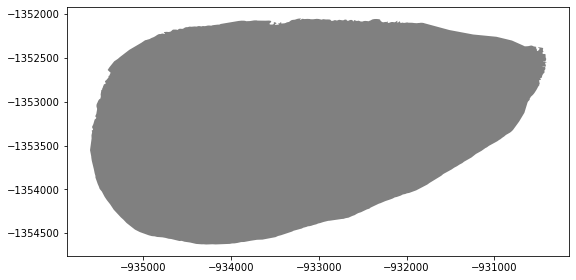

In [51]:
#plot polygon to check it looks ok

import shapefile as shpf
AMP_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
reef_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island_island.shp'
reefBuffer_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island_island_buffer20km.shp'

plt.figure(figsize=(9,9))

CI = shpf.Reader(AMP_path)
#CI_I = shpf.Reader(reef_path)
CI_IB = shpf.Reader(reefBuffer_path)

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(figsize=(9,9),color='gray')

for shape in CI.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')

# for shape in CI_I.shapeRecords():
#     x = [i[0] for i in shape.shape.points[:]]
#     y = [i[1] for i in shape.shape.points[:]]
#     plt.plot(x, y, 'k',color='red')
for shape in CI_IB.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')

data1.chl_oc3[1].plot(cmap='YlGn')


**the pad function for linear interpolation of missing data in a time series**

In [14]:
import numpy as np
import scipy.ndimage as ndimage
def pad(data, maxPadLength=False):
    '''

    Linearly interpolate over missing data (NaNs) in a time series.

    Inputs:

      data	     Time series [1D numpy array]
      maxPadLength   Specifies the maximum length over which to interpolate,
                     i.e., any consecutive blocks of NaNs with length greater
                     than maxPadLength will be left as NaN. Set as an integer.
                     maxPadLength=False (default) interpolates over all NaNs.

    Written by Eric Oliver, Institue for Marine and Antarctic Studies, University of Tasmania, Jun 2015

    '''
    data_padded = data.copy()
    bad_indexes = np.isnan(data)
    good_indexes = np.logical_not(bad_indexes)
    good_data = data[good_indexes]
    interpolated = np.interp(bad_indexes.nonzero()[0], good_indexes.nonzero()[0], good_data)
    data_padded[bad_indexes] = interpolated
    if maxPadLength:
        blocks, n_blocks = ndimage.label(np.isnan(data))
        for bl in range(1, n_blocks+1):
            if (blocks==bl).sum() > maxPadLength:
                data_padded[blocks==bl] = np.nan

    return data_padded


##### **chlDF contains all chl_oc3 data loaded: 156 (12 x 13) locations (as columns) with 6214 daily time-series (as rows)**

**latlonDF contains the X, Y coordinates of the locations**

In [15]:
chlDF = pd.DataFrame()
latlonDF = pd.DataFrame()
latList = []
lonList = []
idList = []
latIndex = 0
lonIndex = 0
id = 1
while latIndex < data1.y.size:
    while lonIndex < data1.x.size:
        lat = data1.chl_oc3[:,latIndex,lonIndex].y.values
        lon = data1.chl_oc3[:,latIndex,lonIndex].x.values
        latList.append(lat)
        lonList.append(lon)
        idList.append(str(id))
        chlData = data1.chl_oc3[:,latIndex,lonIndex].values
        chlDF[str(id)] = chlData
        id += 1
        lonIndex += 1
    latIndex += 1
    lonIndex = 0
dateList = []
i = 0
while i < data1.time.size:
    date = str(data1.time[i].data)[:4] + str(data1.time[i].data)[5:7] + str(data1.time[i].data)[8:10]
    dateList.append(date)
    i += 1
chlDF['date'] = dateList
chlDF.set_index('date', inplace=True)
latlonDF['id'] = idList
latlonDF['lat'] = latList
latlonDF['lon'] = lonList
latlonDF.set_index('id', inplace=True)

**add year column**

In [16]:
yearList = []
for date in chlDF.index:
    year = date[:4]
    yearList.append(year)
chlDF['year'] = yearList

In [17]:
chlDF.tail(10)

,1,2,3,4,5,6,7,8,9,10,...,148,149,150,151,152,153,154,155,156,year
date,,,,,,,,,,,,,,,,,,,,,
20190713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
20190714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
20190715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
20190716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
20190717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
20190718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
20190719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
20190720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
20190721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


**The yearCHLDF contains time-series of annual mean CHL values for pixels that have at least some valid data**

In [18]:
yearCHLDF = pd.DataFrame()
for col in chlDF.columns:
    print(col)
    if col.isdigit():
        
        nuData = chlDF.index.size - np.isnan(chlDF[col]).sum()
        if nuData > 0:            
            x = chlDF[col].groupby(chlDF['year']) # groupby year
            xDF = x.describe() # a DataFrame containing the results of the groupby operation
            yearCHLDF[col] = xDF['mean'] # only interest in the mean statistic

        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
year


In [19]:
yearCHLDF

,17,18,19,20,27,28,29,30,31,32,...,127,128,129,130,136,137,138,139,140,141
year,,,,,,,,,,,,,,,,,,,,,
2002,0.171153,0.190303,0.187808,0.187800,0.183067,0.186128,0.191023,0.201984,0.187414,0.186748,...,0.167708,0.168199,0.168064,0.182356,0.158087,0.155058,0.155880,0.156768,0.156063,0.166442
2003,0.208515,0.214367,0.216218,0.214409,0.204974,0.201844,0.212122,0.211728,0.214220,0.219820,...,0.192402,0.189255,0.185186,0.186132,0.190276,0.189820,0.187077,0.186671,0.185581,0.184588
2004,0.225289,0.227236,0.220717,0.263312,0.226134,0.268026,0.224019,0.220552,0.217886,0.255888,...,0.243168,0.237667,0.203219,0.202908,0.198088,0.197528,0.205960,0.214775,0.211166,0.188602
2005,0.194390,0.201756,0.205436,0.215948,0.194089,0.186219,0.203398,0.201412,0.205703,0.199791,...,0.191798,0.185624,0.186996,0.198015,0.171013,0.178821,0.180278,0.179960,0.180528,0.182673
2006,0.279976,0.271540,0.273046,0.276329,0.250070,0.264186,0.267505,0.275037,0.274342,0.276923,...,0.249431,0.258194,0.259134,0.259958,0.241443,0.254589,0.235677,0.246531,0.263545,0.266333
2007,0.203018,0.205043,0.205167,0.207487,0.198524,0.208381,0.216074,0.217754,0.214139,0.214061,...,0.194871,0.198140,0.198296,0.197558,0.184828,0.181429,0.185991,0.190527,0.191789,0.186291
2008,0.255280,0.252980,0.253688,0.248107,0.250739,0.241005,0.261615,0.255411,0.256185,0.246927,...,0.232134,0.231786,0.232384,0.235576,0.234944,0.228667,0.230528,0.223659,0.229327,0.229196
2009,0.169476,0.176943,0.173385,0.177582,0.168556,0.166748,0.172917,0.172889,0.168485,0.173610,...,0.175033,0.174315,0.170937,0.180501,0.157042,0.160486,0.167121,0.176718,0.168780,0.167748
2010,0.198734,0.196680,0.199642,0.200558,0.190008,0.200486,0.192488,0.199337,0.203579,0.199795,...,0.195764,0.200010,0.193491,0.195838,0.175689,0.180955,0.188377,0.190576,0.192563,0.195420


**years 2002 and 2019 are partial years and should be excluded for time-series analyses**

In [20]:
yearCHLDF1 = yearCHLDF.loc['2003':'2018']

**The yearRateDF contains, for each valid pixel, the fitted CHL annual trend rate, the number of days with data and the observation frequency within the time-series of the annual mean. A low observation frequency indicates high uncertainty of the fitted trend.**

In [21]:
import statsmodels.formula.api as sm
ind = np.arange(1,yearCHLDF1.index.size+1,1)
yearCHLDF1['ind'] = ind
yearRateDF = pd.DataFrame()
idList = []
rateList = []
pValueList = []
for col in yearCHLDF1.columns:
    print(col)
    if col.isdigit():
        idList.append(col)
        # note the Q() function for the proper handling of the number as a column name
        formula = 'Q("' + col + '")' + ' ~ ind'
        
        fit = sm.ols(formula=formula, data=yearCHLDF1).fit()

        predict = fit.predict(yearCHLDF1)
        yearCHLDF1['fitted'] = predict
        rate = round(fit.params[1],3)
        pValue = round(fit.pvalues[1],2)
        
        rateList.append(rate)
        pValueList.append(pValue)
yearRateDF['id'] = idList
yearRateDF['rate'] = rateList
yearRateDF['pValue'] = pValueList

countList = []
freqList = []
for col in chlDF.columns:
    if col.isdigit():        
        x = chlDF.index.size - np.isnan(chlDF[col]).sum()
        if x > 0:            
            f = x/chlDF.index.size
            countList.append(x)
            freqList.append(f)
yearRateDF['count'] = countList
yearRateDF['frequency'] = freqList
yearRateDF.set_index("id",inplace=True)

/g/data/v10/public/modules/dea-env/20191127/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


17


/g/data/v10/public/modules/dea-env/20191127/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


18
19
20
27
28
29
30
31
32
33
34
38
39
40
41
42
43
44
45
46
47
50
51
52
53
57
58
59
61
62
63
71
72
73
74
75
83
84
85
86
87
95
96
98
99
106
107
110
111
112
116
117
118
119
123
124
125
126
127
128
129
130
136
137
138
139
140
141
ind


**add the x and y columns to the yearRateDF**

In [22]:
xList = []
yList = []
for id in yearRateDF.index:
    x = int(latlonDF.loc[id]['lon'])
    y = int(latlonDF.loc[id]['lat'])
    xList.append(x)
    yList.append(y)
yearRateDF['x'] = xList
yearRateDF['y'] = yList

In [23]:
yearRateDF

,rate,pValue,count,frequency,x,y
id,,,,,,
17,0.000,0.97,2165,0.348407,-935350,-1346150
18,0.000,0.99,2171,0.349372,-934050,-1346150
19,-0.000,0.86,2172,0.349533,-932750,-1346150
20,-0.001,0.55,2186,0.351786,-931450,-1346150
27,0.001,0.64,2152,0.346315,-937950,-1347450
...,...,...,...,...,...,...
137,0.000,0.92,2162,0.347924,-935350,-1359150
138,0.001,0.65,2148,0.345671,-934050,-1359150
139,0.000,0.95,2154,0.346637,-932750,-1359150


**plot the annual trends for the pixels; the low observation frequency could indicate high uncertainty**

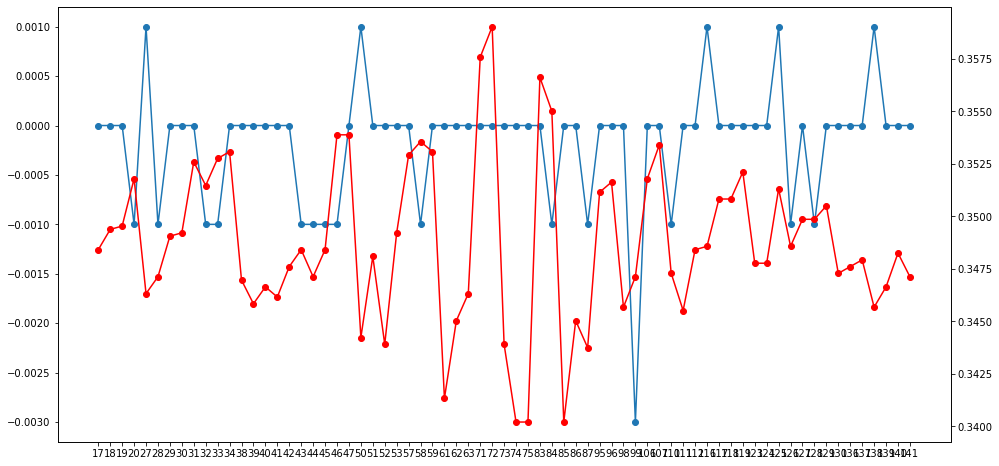

In [24]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax1.plot(yearRateDF.index,yearRateDF['rate'],marker='o')
ax2.plot(yearRateDF.index,yearRateDF['frequency'],color='red',marker='o')

**convert the yearRateDF to an xarray dataset**

In [25]:
import xarray as xr
yearRateDF1 = yearRateDF.copy()
yearRateDF1.set_index(['y','x'],inplace=True)
yearRateData = xr.Dataset.from_dataframe(yearRateDF1)
yearRateData.attrs['crs']='EPSG:3577'

In [26]:
yearRateData

<xarray.Dataset>
Dimensions:    (x: 12, y: 11)
Coordinates:
  * y          (y) int64 -1359150 -1357850 -1356550 ... -1347450 -1346150
  * x          (x) int64 -940550 -939250 -937950 ... -928850 -927550 -926250
Data variables:
    rate       (y, x) float64 nan nan nan -0.0 0.0 ... -0.001 nan nan nan nan
    pValue     (y, x) float64 nan nan nan 0.96 0.92 ... 0.55 nan nan nan nan
    count      (y, x) float64 nan nan nan 2.16e+03 2.162e+03 ... nan nan nan nan
    frequency  (y, x) float64 nan nan nan 0.3476 0.3479 ... nan nan nan nan
Attributes:
    crs:      EPSG:3577

**display the spatial distribution of the annual trend rates; the black dots indicate that the pixels have statitically significant warming rates at 80% confidence level**

<Figure size 1008x720 with 0 Axes>

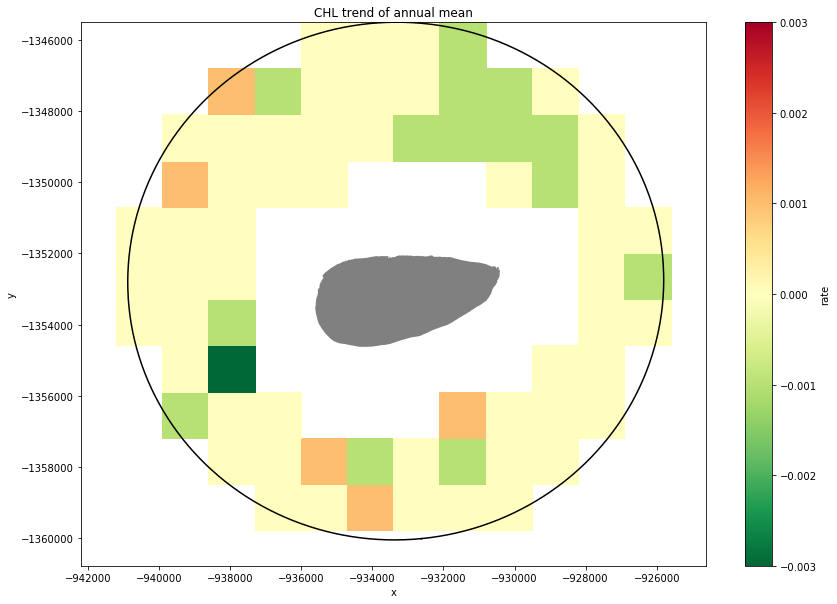

In [166]:
import shapefile as shpf
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
reef_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island_island.shp'
LH = shpf.Reader(poly_path)
minV = yearRateData['rate'].min()
maxV = yearRateData['rate'].max()

if maxV < 0:
    colormap = 'YlGn'
if minV > 0:
    colormap = 'YlGn'
if (minV < 0)&(maxV > 0):
    colormap = 'RdYlGn_r'
    minV = max(abs(minV),maxV) * -1
    maxV = max(abs(minV),maxV)
    
plt.figure(figsize=(14,10))

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(figsize=(14,10),color='gray')

yearRateData['rate'].plot(cmap=colormap,vmin=minV,vmax=maxV)
plt.title('CHL trend of annual mean')
plt.axis('equal')
# only highlight data points where pValue <= 0.20, representing significance level >= 80%
tempDF = yearRateDF[yearRateDF['pValue'] <= 0.20]
x = tempDF['x']
y = tempDF['y']

plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')


**export the xarray dataset to a netcdf file**

In [28]:
yearRateData.to_netcdf(path='/home/547/zxh547/dea-notebooks/yearRateData_CHL.nc')

**plot the data, save it as an image, display the image**

<Figure size 1008x720 with 0 Axes>

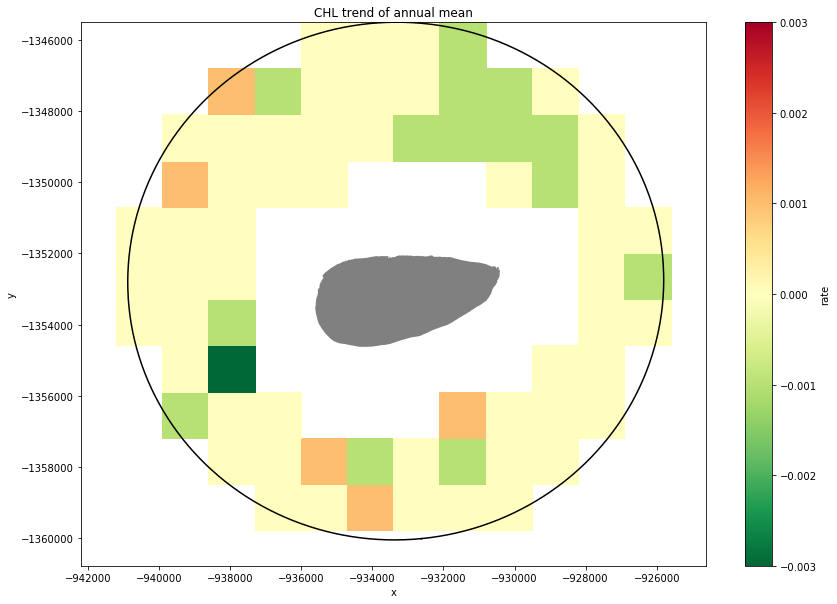

In [167]:
from PIL import Image
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
LH = shpf.Reader(poly_path)

minV = yearRateData['rate'].min()
maxV = yearRateData['rate'].max()

if maxV < 0:
    colormap = 'YlGn'
if minV > 0:
    colormap = 'YlGn'
if (minV < 0)&(maxV > 0):
    colormap = 'RdYlGn_r'
    minV = max(abs(minV),maxV) * -1
    maxV = max(abs(minV),maxV)
    
plt.figure(figsize=(14,10))

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(figsize=(14,10),color='gray')

yearRateData['rate'].plot(cmap=colormap,vmin=minV,vmax=maxV)
plt.title('CHL trend of annual mean')
plt.axis('equal')
# only highlight data points where pValue <= 0.20, representing significance level >= 80%
tempDF = yearRateDF[yearRateDF['pValue'] <= 0.20]
x = tempDF['x']
y = tempDF['y']

plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')

figName = "rateTest_CHL.png"
plt.savefig("/home/547/zxh547/dea-notebooks/" + figName)
plt.close(fig)
img1 = Image.open("/home/547/zxh547/dea-notebooks/" + figName)
img1.show()

**The overallDF contains the long-term mean (std) CHL values for each valid pixels**

In [30]:
overallDF = pd.DataFrame()
meanList = []
stdList = []
countList = []
freqList = []
idList = []
for col in chlDF.columns:
    if col.isdigit():        
        x = chlDF.index.size - np.isnan(chlDF[col]).sum()
        if x > 0:        
            chlMean = chlDF[col].mean()
            chlStd = chlDF[col].std()
            f = x/chlDF.index.size
            meanList.append(chlMean)
            stdList.append(chlStd)
            countList.append(x)
            freqList.append(f)
            idList.append(col)
overallDF['id'] = idList
overallDF['mean'] = meanList
overallDF['std'] = stdList
overallDF['count'] = countList
overallDF['frequency'] = freqList
overallDF.set_index('id', inplace=True)

xList = []
yList = []
for id in overallDF.index:
    x = int(latlonDF.loc[id]['lon'])
    y = int(latlonDF.loc[id]['lat'])
    xList.append(x)
    yList.append(y)
overallDF['x'] = xList
overallDF['y'] = yList

In [31]:
overallDF

,mean,std,count,frequency,x,y
id,,,,,,
17,0.222927,0.148286,2165,0.348407,-935350,-1346150
18,0.224680,0.149744,2171,0.349372,-934050,-1346150
19,0.223613,0.146756,2172,0.349533,-932750,-1346150
20,0.228526,0.171122,2186,0.351786,-931450,-1346150
27,0.222678,0.171154,2152,0.346315,-937950,-1347450
...,...,...,...,...,...,...
137,0.202423,0.153689,2162,0.347924,-935350,-1359150
138,0.206664,0.161318,2148,0.345671,-934050,-1359150
139,0.207966,0.192286,2154,0.346637,-932750,-1359150


**convert the dataframe to an xarray daaset**

In [32]:
import xarray as xr
overallDF1 = overallDF.copy()
overallDF1.set_index(['y','x'],inplace=True)
overallData = xr.Dataset.from_dataframe(overallDF1)
overallData.attrs['crs']='EPSG:3577'

In [33]:
overallData

<xarray.Dataset>
Dimensions:    (x: 12, y: 11)
Coordinates:
  * y          (y) int64 -1359150 -1357850 -1356550 ... -1347450 -1346150
  * x          (x) int64 -940550 -939250 -937950 ... -928850 -927550 -926250
Data variables:
    mean       (y, x) float64 nan nan nan 0.1999 0.2024 ... nan nan nan nan
    std        (y, x) float64 nan nan nan 0.1472 0.1537 ... nan nan nan nan
    count      (y, x) float64 nan nan nan 2.16e+03 2.162e+03 ... nan nan nan nan
    frequency  (y, x) float64 nan nan nan 0.3476 0.3479 ... nan nan nan nan
Attributes:
    crs:      EPSG:3577

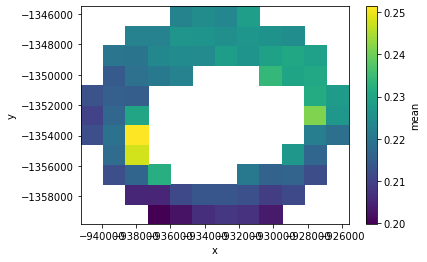

In [34]:
overallData['mean'].plot()

In [35]:
overallData.to_netcdf(path='/home/547/zxh547/dea-notebooks/overallData_CHL.nc')

**plot the spatial distribution of the CHL long-term mean; the black dots indicate that the pixels have observation frequency > 30% of the time-series**

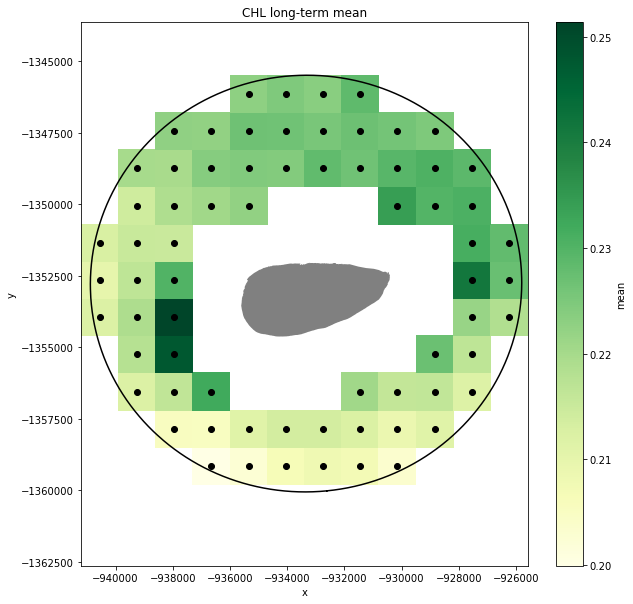

In [86]:
from PIL import Image
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
LH = shpf.Reader(poly_path)
fig = plt.figure(figsize=(10,10))

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(figsize=(10,10),color='gray')

overallData['mean'].plot(cmap='YlGn')
plt.axis('equal')
plt.title('CHL long-term mean')
tempDF = overallDF[overallDF['frequency'] >= 0.30]
x = tempDF['x']
y = tempDF['y']

plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():

    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
figName = "overallMeanTest_CHL.png"
plt.savefig("/home/547/zxh547/dea-notebooks/" + figName)
plt.close(fig)
img1 = Image.open("/home/547/zxh547/dea-notebooks/" + figName)
img1.show()

**add season and month columns**

In [38]:
seasonList = []
monthList = []
for date in chlDF.index:
    month = date[4:6]
    monthList.append(month)
    if month in ['12','01','02']:
        season = 'summer'
    elif month in ['03','04','05']:
        season = 'autumn'
    elif month in ['06','07','08']:
        season = 'winter'
    else:
        season = 'spring'
    seasonList.append(season)
chlDF['season'] = seasonList
chlDF['month'] = monthList

In [39]:
chlDF['20100902':'20101203']

,1,2,3,4,5,6,7,8,9,10,...,150,151,152,153,154,155,156,year,season,month
date,,,,,,,,,,,,,,,,,,,,,
20100902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,spring,09
20100903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,spring,09
20100904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,spring,09
20100905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,spring,09
20100906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,spring,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20101129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,spring,11
20101130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,spring,11
20101201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,summer,12


**seasonal statistics (e.g., mean, std, etc) for each valid pixels**

In [40]:
winterCHLDF = pd.DataFrame()
springCHLDF = pd.DataFrame()
summerCHLDF = pd.DataFrame()
autumnCHLDF = pd.DataFrame()
wi_meanList = []
wi_stdList = []
wi_countList = []
wi_freqList = []
sp_meanList = []
sp_stdList = []
sp_countList = []
sp_freqList = []
su_meanList = []
su_stdList = []
su_countList = []
su_freqList = []
au_meanList = []
au_stdList = []
au_countList = []
au_freqList = []

idList = []
for col in chlDF.columns:
    print(col)
    if col.isdigit():
             
        nuData = chlDF.index.size - np.isnan(chlDF[col]).sum()
        if nuData > 0:            
            x = chlDF[col].groupby(chlDF['season']) # groupby season
            xDF = x.describe() # a DataFrame containing the results of the groupby operation
            wi_mean = xDF.loc['winter']['mean']
            wi_std = xDF.loc['winter']['std']
            wi_count = xDF.loc['winter']['count']
            wi_freq = xDF.loc['winter']['count'] / (chlDF['season']=='winter').sum()
            
            sp_mean = xDF.loc['spring']['mean']
            sp_std = xDF.loc['spring']['std']
            sp_count = xDF.loc['spring']['count']
            sp_freq = xDF.loc['spring']['count'] / (chlDF['season']=='spring').sum()
            
            su_mean = xDF.loc['summer']['mean']
            su_std = xDF.loc['summer']['std']
            su_count = xDF.loc['summer']['count']
            su_freq = xDF.loc['summer']['count'] / (chlDF['season']=='summer').sum()
            
            au_mean = xDF.loc['autumn']['mean']
            au_std = xDF.loc['autumn']['std']
            au_count = xDF.loc['autumn']['count']
            au_freq = xDF.loc['autumn']['count'] / (chlDF['season']=='autumn').sum()
            
            idList.append(col)
            
            wi_meanList.append(wi_mean)
            wi_stdList.append(wi_std)
            wi_countList.append(wi_count)
            wi_freqList.append(wi_freq)
            
            sp_meanList.append(sp_mean)
            sp_stdList.append(sp_std)
            sp_countList.append(sp_count)
            sp_freqList.append(sp_freq)
            
            su_meanList.append(su_mean)
            su_stdList.append(su_std)
            su_countList.append(su_count)
            su_freqList.append(su_freq)
            
            au_meanList.append(au_mean)
            au_stdList.append(au_std)
            au_countList.append(au_count)
            au_freqList.append(au_freq)
            
winterCHLDF['id'] = idList
winterCHLDF['mean'] = wi_meanList
winterCHLDF['std'] = wi_stdList
winterCHLDF['count'] = wi_countList
winterCHLDF['frequency'] = wi_freqList
winterCHLDF.set_index('id',inplace=True)

springCHLDF['id'] = idList
springCHLDF['mean'] = sp_meanList
springCHLDF['std'] = sp_stdList
springCHLDF['count'] = sp_countList
springCHLDF['frequency'] = sp_freqList
springCHLDF.set_index('id',inplace=True)

summerCHLDF['id'] = idList
summerCHLDF['mean'] = su_meanList
summerCHLDF['std'] = su_stdList
summerCHLDF['count'] = su_countList
summerCHLDF['frequency'] = su_freqList
summerCHLDF.set_index('id',inplace=True)

autumnCHLDF['id'] = idList
autumnCHLDF['mean'] = au_meanList
autumnCHLDF['std'] = au_stdList
autumnCHLDF['count'] = au_countList
autumnCHLDF['frequency'] = au_freqList
autumnCHLDF.set_index('id',inplace=True)
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
year
season
month


**add x and y to the seasonal dataframes**

In [41]:
xList = []
yList = []
for id in winterCHLDF.index:
    x = int(latlonDF.loc[id]['lon'])
    y = int(latlonDF.loc[id]['lat'])
    xList.append(x)
    yList.append(y)
winterCHLDF['x'] = xList
winterCHLDF['y'] = yList

springCHLDF['x'] = xList
springCHLDF['y'] = yList

summerCHLDF['x'] = xList
summerCHLDF['y'] = yList

autumnCHLDF['x'] = xList
autumnCHLDF['y'] = yList

In [42]:
autumnCHLDF

,mean,std,count,frequency,x,y
id,,,,,,
17,0.182431,0.109073,575.0,0.367647,-935350,-1346150
18,0.185965,0.114182,584.0,0.373402,-934050,-1346150
19,0.183928,0.110600,597.0,0.381714,-932750,-1346150
20,0.199374,0.169518,578.0,0.369565,-931450,-1346150
27,0.181843,0.116147,581.0,0.371483,-937950,-1347450
...,...,...,...,...,...,...
137,0.154937,0.106188,580.0,0.370844,-935350,-1359150
138,0.165372,0.143113,582.0,0.372123,-934050,-1359150
139,0.165475,0.130135,576.0,0.368286,-932750,-1359150


**convert dataframes to xarry datasets and export them as netcdf files**

In [43]:
import xarray as xr
winterCHLDF1 = winterCHLDF.copy()
winterCHLDF1.set_index(['y','x'],inplace=True)
winterCHLData = xr.Dataset.from_dataframe(winterCHLDF1)
winterCHLData.attrs['crs']='EPSG:3577'
winterCHLData.to_netcdf(path='/home/547/zxh547/dea-notebooks/winterCHLData.nc')

springCHLDF1 = springCHLDF.copy()
springCHLDF1.set_index(['y','x'],inplace=True)
springCHLData = xr.Dataset.from_dataframe(springCHLDF1)
springCHLData.attrs['crs']='EPSG:3577'
springCHLData.to_netcdf(path='/home/547/zxh547/dea-notebooks/springCHLData.nc')

summerCHLDF1 = summerCHLDF.copy()
summerCHLDF1.set_index(['y','x'],inplace=True)
summerCHLData = xr.Dataset.from_dataframe(summerCHLDF1)
summerCHLData.attrs['crs']='EPSG:3577'
summerCHLData.to_netcdf(path='/home/547/zxh547/dea-notebooks/summerCHLData.nc')

autumnCHLDF1 =autumnCHLDF.copy()
autumnCHLDF1.set_index(['y','x'],inplace=True)
autumnCHLData = xr.Dataset.from_dataframe(autumnCHLDF1)
autumnCHLData.attrs['crs']='EPSG:3577'
autumnCHLData.to_netcdf(path='/home/547/zxh547/dea-notebooks/autumnCHLData.nc')

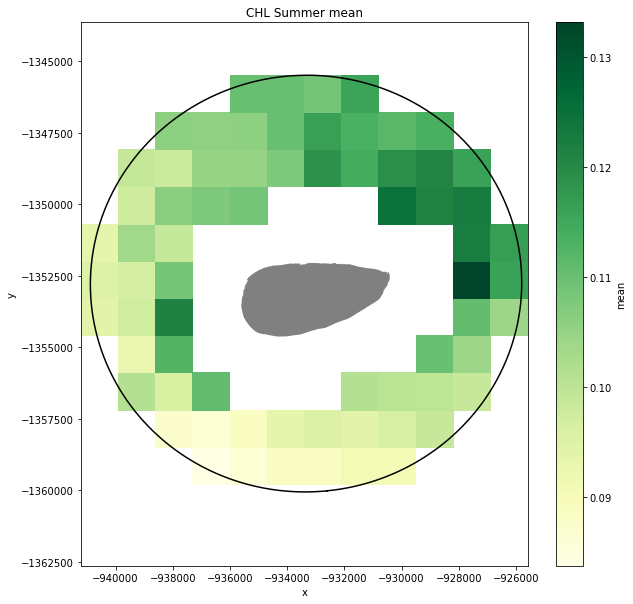

In [87]:
from PIL import Image
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
LH = shpf.Reader(poly_path)
fig = plt.figure(figsize=(10,10))
shape_plot = gpd.read_file(reef_path)
shape_plot.plot(figsize=(10,10),color='gray')
summerCHLData['mean'].plot(cmap='YlGn')
for shape in LH.shapeRecords():

    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
plt.axis('equal')
plt.title('CHL Summer mean')
figName = "winterMeanTest_CHL.png"
plt.savefig("/home/547/zxh547/dea-notebooks/" + figName)
plt.close(fig)
img1 = Image.open("/home/547/zxh547/dea-notebooks/" + figName)
img1.show()

**display spatial distributions of seasonal mean; the black dots indicate the observation frequency greater than 30%**

In [54]:
winterCHLData['mean'].min().values

array(0.30611086)

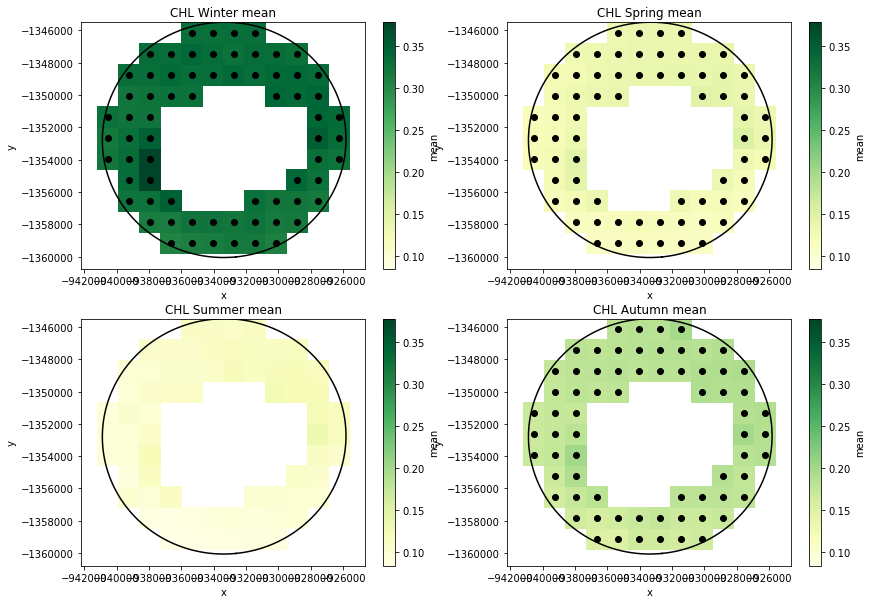

In [93]:
import shapefile as shpf
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
LH = shpf.Reader(poly_path)
plt.figure(figsize=(14,10))

x = [winterCHLData['mean'].min().values,summerCHLData['mean'].min().values,springCHLData['mean'].min().values,autumnCHLData['mean'].min().values]
minV = min(x)
x = [winterCHLData['mean'].max().values,summerCHLData['mean'].max().values,springCHLData['mean'].max().values,
     autumnCHLData['mean'].max().values]
maxV = max(x)

plt.subplot(2,2,1)
# shape_plot = gpd.read_file(reef_path)
# shape_plot.plot(figsize=(3,3),color='gray')
winterCHLData['mean'].plot(cmap='YlGn',vmax=maxV,vmin=minV)
plt.title('CHL Winter mean')
plt.axis('equal')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
tempDF = winterCHLDF[winterCHLDF['frequency'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')


plt.subplot(2,2,2)
springCHLData['mean'].plot(cmap='YlGn',vmax=maxV,vmin=minV)
plt.title('CHL Spring mean')
plt.axis('equal')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
tempDF = springCHLDF[springCHLDF['frequency'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')

plt.subplot(2,2,3)
summerCHLData['mean'].plot(cmap='YlGn',vmax=maxV,vmin=minV)
plt.title('CHL Summer mean')
plt.axis('equal')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
tempDF = summerCHLDF[summerCHLDF['frequency'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')

plt.subplot(2,2,4)
autumnCHLData['mean'].plot(cmap='YlGn',vmax=maxV,vmin=minV)
plt.title('CHL Autumn mean')
plt.axis('equal')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
tempDF =autumnCHLDF[autumnCHLDF['frequency'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')

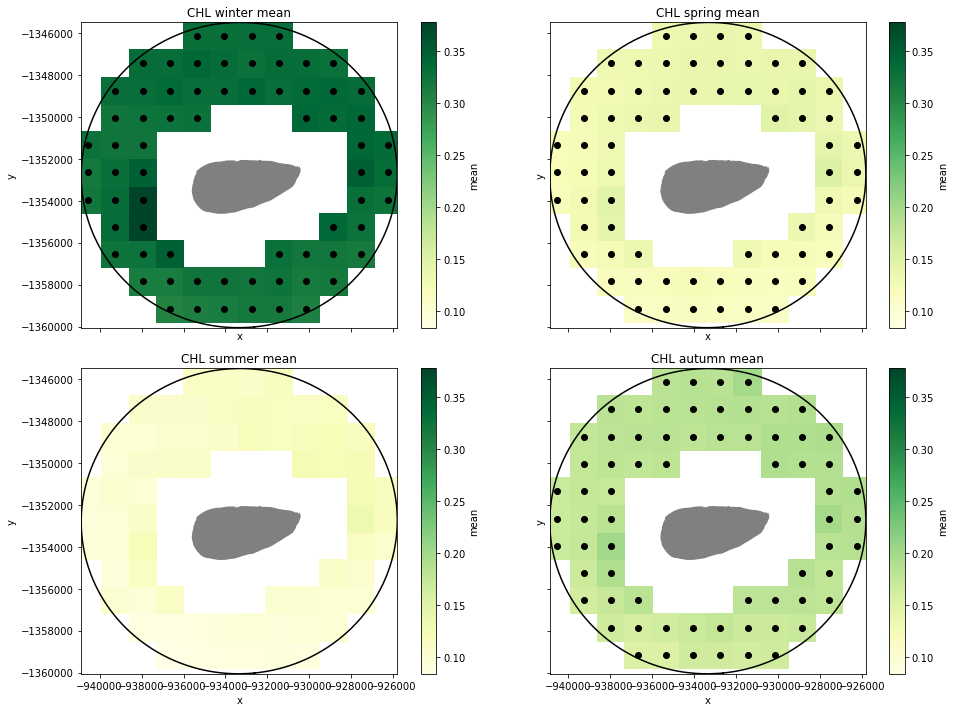

In [176]:
import shapefile as shpf
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
LH = shpf.Reader(poly_path)

x=[winterCHLData['mean'].min().values,summerCHLData['mean'].min().values,
  springCHLData['mean'].min().values,autumnCHLData['mean'].min().values]
minV = min(x)
x=[winterCHLData['mean'].max().values,summerCHLData['mean'].max().values,
  springCHLData['mean'].max().values,autumnCHLData['mean'].max().values]
maxV = max(x)
if maxV < 0:
    colormap = 'YlGn'
if minV > 0:
    colormap = 'YlGn'
if (minV < 0)&(maxV > 0):
    colormap = 'RdYlGn_r'
    minV = max(abs(minV),maxV) * -1
    maxV = max(abs(minV),maxV)


f, axes = plt.subplots(2,2,sharex='all',sharey='all',figsize=(14,10))

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(figsize=(10,10),color='gray',ax=axes[0,0])

winterCHLData['mean'].plot(cmap=colormap,ax=axes[0,0],vmin=minV,vmax=maxV)
axes[0,0].set_title('CHL winter mean')
#axes[0,0].axis('equal')

tempDF = winterCHLDF[winterCHLDF['frequency'] >= 0.30]
x = tempDF['x']
y = tempDF['y']

axes[0,0].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[0,0].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(figsize=(10,10),color='gray',ax=axes[0,1])
springCHLData['mean'].plot(cmap=colormap,ax=axes[0,1],vmin=minV,vmax=maxV)
axes[0,1].set_title('CHL spring mean')
#axes[0,1].axis('equal')

tempDF = springCHLDF[springCHLDF['frequency'] >= 0.30]
x = tempDF['x']
y = tempDF['y']

axes[0,1].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[0,1].plot(x, y, 'k')
    
shape_plot = gpd.read_file(reef_path)
shape_plot.plot(figsize=(10,10),color='gray',ax=axes[1,0])
summerCHLData['mean'].plot(cmap=colormap,ax=axes[1,0],vmin=minV,vmax=maxV)
axes[1,0].set_title('CHL summer mean')
#axes[1,0].axis('equal')

tempDF = summerCHLDF[summerCHLDF['frequency'] >= 0.30]
x = tempDF['x']
y = tempDF['y']

axes[1,0].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[1,0].plot(x, y, 'k')
    
shape_plot = gpd.read_file(reef_path)
shape_plot.plot(figsize=(10,10),color='gray',ax=axes[1,1])
autumnCHLData['mean'].plot(cmap=colormap,ax=axes[1,1],vmin=minV,vmax=maxV)
axes[1,1].set_title('CHL autumn mean')
#axes[1,1].axis('equal')

tempDF = autumnCHLDF[autumnCHLDF['frequency'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
axes[1,1].scatter(x,y,c='black')

for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]    
    axes[1,1].plot(x, y, 'k')

xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)

axes[0,0].axis([xmin,xmax,ymin,ymax])
f.tight_layout()    
plt.show()

**A conveinent function for calculating CHL monthly statistics**

In [94]:
def monthDF(month):
    meanList = []
    stdList = []
    countList = []
    freqList = []
    idList = []
    tempDF = pd.DataFrame()
    for col in chlDF.columns:
        if col.isdigit():
            nuData = chlDF.index.size - np.isnan(chlDF[col]).sum()
            if nuData > 0:            
                x = chlDF[col].groupby(chlDF['month']) # groupby month
                xDF = x.describe() # a DataFrame containing the results of the groupby operation
                mean = xDF.loc[month]['mean']
                std = xDF.loc[month]['std']
                count = xDF.loc[month]['count']
                freq = xDF.loc[month]['count'] / (chlDF['month']==month).sum() 

                idList.append(col)

                meanList.append(mean)
                stdList.append(std)
                countList.append(count)
                freqList.append(freq)
    tempDF['id'] = idList
    tempDF['mean'] = meanList
    tempDF['std'] = stdList
    tempDF['count'] = countList
    tempDF['freq'] = freqList
    tempDF.set_index('id',inplace=True)
    return tempDF


    

**calculate monthly statistics for each valid pixel**

In [95]:
JanCHLDF = monthDF('01')
FebCHLDF = monthDF('02')
MarCHLDF = monthDF('03')
AprCHLDF = monthDF('04')
MayCHLDF = monthDF('05')
JunCHLDF = monthDF('06')
JulCHLDF = monthDF('07')
AugCHLDF = monthDF('08')
SepCHLDF = monthDF('09')
OctCHLDF = monthDF('10')
NovCHLDF = monthDF('11')
DecCHLDF = monthDF('12')
             

        

In [96]:
DecCHLDF

,mean,std,count,freq
id,,,,
17,0.089336,0.034189,56.0,0.106667
18,0.088399,0.043063,57.0,0.108571
19,0.090844,0.053115,59.0,0.112381
20,0.093392,0.046984,63.0,0.120000
27,0.098484,0.070500,51.0,0.097143
...,...,...,...,...
137,0.073479,0.040872,55.0,0.104762
138,0.077411,0.041750,56.0,0.106667
139,0.073887,0.034898,61.0,0.116190


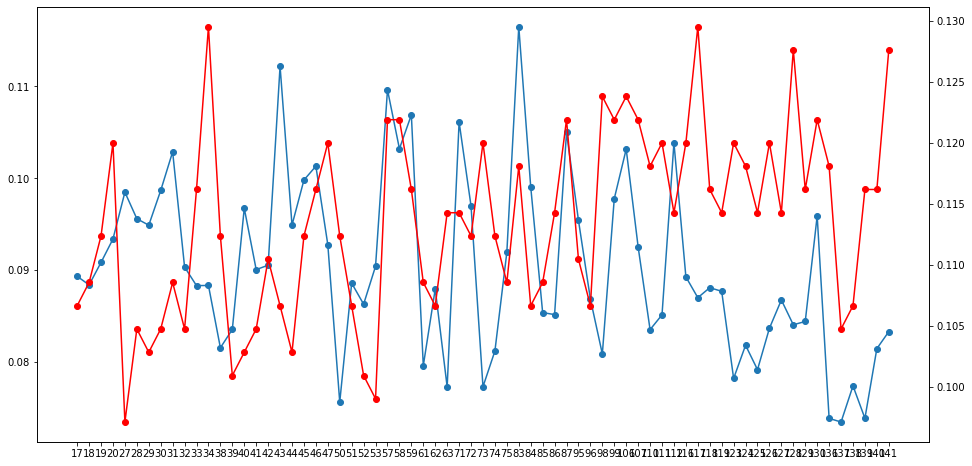

In [97]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax1.plot(DecCHLDF.index,DecCHLDF['mean'],marker='o')
ax2.plot(DecCHLDF.index,DecCHLDF['freq'],color='red',marker='o')

In [98]:
xList = []
yList = []
for id in JanCHLDF.index:
    x = int(latlonDF.loc[id]['lon'])
    y = int(latlonDF.loc[id]['lat'])
    xList.append(x)
    yList.append(y)
JanCHLDF['x'] = xList
JanCHLDF['y'] = yList
FebCHLDF['x'] = xList
FebCHLDF['y'] = yList
MarCHLDF['x'] = xList
MarCHLDF['y'] = yList
AprCHLDF['x'] = xList
AprCHLDF['y'] = yList
MayCHLDF['x'] = xList
MayCHLDF['y'] = yList
JunCHLDF['x'] = xList
JunCHLDF['y'] = yList
JulCHLDF['x'] = xList
JulCHLDF['y'] = yList
AugCHLDF['x'] = xList
AugCHLDF['y'] = yList
SepCHLDF['x'] = xList
SepCHLDF['y'] = yList
OctCHLDF['x'] = xList
OctCHLDF['y'] = yList
NovCHLDF['x'] = xList
NovCHLDF['y'] = yList
DecCHLDF['x'] = xList
DecCHLDF['y'] = yList



In [58]:
JanCHLDF

,mean,std,count,freq,x,y
id,,,,,,
17,0.112039,0.055311,54.0,0.102467,-935350,-1346150
18,0.113309,0.049747,52.0,0.098672,-934050,-1346150
19,0.107028,0.051361,47.0,0.089184,-932750,-1346150
20,0.119556,0.045638,50.0,0.094877,-931450,-1346150
27,0.103427,0.051267,51.0,0.096774,-937950,-1347450
...,...,...,...,...,...,...
137,0.091283,0.043050,56.0,0.106262,-935350,-1359150
138,0.097087,0.048480,53.0,0.100569,-934050,-1359150
139,0.097531,0.050555,55.0,0.104364,-932750,-1359150


In [99]:
import xarray as xr
JanCHLDF1 = JanCHLDF.copy()
JanCHLDF1.set_index(['y','x'],inplace=True)
JanCHLData = xr.Dataset.from_dataframe(JanCHLDF1)
JanCHLData.attrs['crs']='EPSG:3577'
JanCHLData.to_netcdf(path='/home/547/zxh547/dea-notebooks/JanCHLData.nc')

import xarray as xr
FebCHLDF1 = FebCHLDF.copy()
FebCHLDF1.set_index(['y','x'],inplace=True)
FebCHLData = xr.Dataset.from_dataframe(FebCHLDF1)
FebCHLData.attrs['crs']='EPSG:3577'
FebCHLData.to_netcdf(path='/home/547/zxh547/dea-notebooks/FebCHLData.nc')

import xarray as xr
MarCHLDF1 = MarCHLDF.copy()
MarCHLDF1.set_index(['y','x'],inplace=True)
MarCHLData = xr.Dataset.from_dataframe(MarCHLDF1)
MarCHLData.attrs['crs']='EPSG:3577'
MarCHLData.to_netcdf(path='/home/547/zxh547/dea-notebooks/MarCHLData.nc')

import xarray as xr
AprCHLDF1 = AprCHLDF.copy()
AprCHLDF1.set_index(['y','x'],inplace=True)
AprCHLData = xr.Dataset.from_dataframe(AprCHLDF1)
AprCHLData.attrs['crs']='EPSG:3577'
AprCHLData.to_netcdf(path='/home/547/zxh547/dea-notebooks/AprCHLData.nc')

import xarray as xr
MayCHLDF1 = MayCHLDF.copy()
MayCHLDF1.set_index(['y','x'],inplace=True)
MayCHLData = xr.Dataset.from_dataframe(MayCHLDF1)
MayCHLData.attrs['crs']='EPSG:3577'
MayCHLData.to_netcdf(path='/home/547/zxh547/dea-notebooks/MayCHLData.nc')

import xarray as xr
JunCHLDF1 = JunCHLDF.copy()
JunCHLDF1.set_index(['y','x'],inplace=True)
JunCHLData = xr.Dataset.from_dataframe(JunCHLDF1)
JunCHLData.attrs['crs']='EPSG:3577'
JunCHLData.to_netcdf(path='/home/547/zxh547/dea-notebooks/JunCHLData.nc')

import xarray as xr
JulCHLDF1 = JulCHLDF.copy()
JulCHLDF1.set_index(['y','x'],inplace=True)
JulCHLData = xr.Dataset.from_dataframe(JulCHLDF1)
JulCHLData.attrs['crs']='EPSG:3577'
JulCHLData.to_netcdf(path='/home/547/zxh547/dea-notebooks/JulCHLData.nc')

import xarray as xr
AugCHLDF1 = AugCHLDF.copy()
AugCHLDF1.set_index(['y','x'],inplace=True)
AugCHLData = xr.Dataset.from_dataframe(AugCHLDF1)
AugCHLData.attrs['crs']='EPSG:3577'
AugCHLData.to_netcdf(path='/home/547/zxh547/dea-notebooks/AugCHLData.nc')

import xarray as xr
SepCHLDF1 = SepCHLDF.copy()
SepCHLDF1.set_index(['y','x'],inplace=True)
SepCHLData = xr.Dataset.from_dataframe(SepCHLDF1)
SepCHLData.attrs['crs']='EPSG:3577'
SepCHLData.to_netcdf(path='/home/547/zxh547/dea-notebooks/SepCHLData.nc')

import xarray as xr
OctCHLDF1 = OctCHLDF.copy()
OctCHLDF1.set_index(['y','x'],inplace=True)
OctCHLData = xr.Dataset.from_dataframe(OctCHLDF1)
OctCHLData.attrs['crs']='EPSG:3577'
OctCHLData.to_netcdf(path='/home/547/zxh547/dea-notebooks/OctCHLData.nc')

import xarray as xr
NovCHLDF1 = NovCHLDF.copy()
NovCHLDF1.set_index(['y','x'],inplace=True)
NovCHLData = xr.Dataset.from_dataframe(NovCHLDF1)
NovCHLData.attrs['crs']='EPSG:3577'
NovCHLData.to_netcdf(path='/home/547/zxh547/dea-notebooks/NovCHLData.nc')

import xarray as xr
DecCHLDF1 = DecCHLDF.copy()
DecCHLDF1.set_index(['y','x'],inplace=True)
DecCHLData = xr.Dataset.from_dataframe(DecCHLDF1)
DecCHLData.attrs['crs']='EPSG:3577'
DecCHLData.to_netcdf(path='/home/547/zxh547/dea-notebooks/DecCHLData.nc')

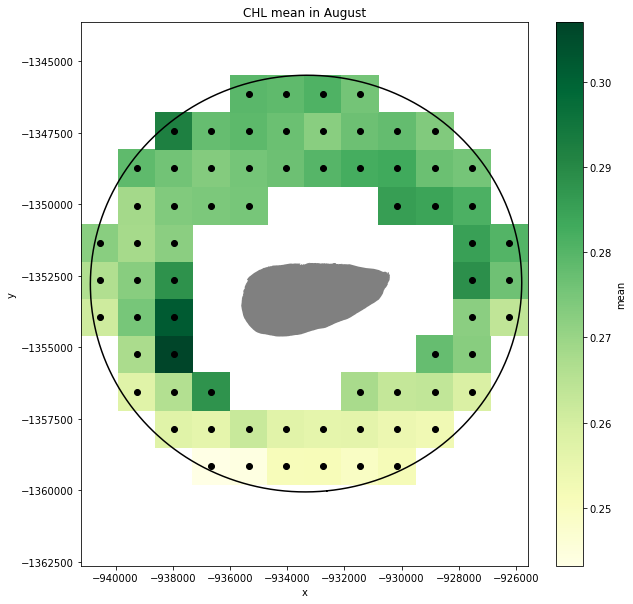

In [175]:
from PIL import Image
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
LH = shpf.Reader(poly_path)
fig = plt.figure(figsize=(10,10))
shape_plot = gpd.read_file(reef_path)
shape_plot.plot(figsize=(10,10),color='gray')
AugCHLData['mean'].plot(cmap='YlGn')
for shape in LH.shapeRecords():

    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
plt.title('CHL mean in August')
plt.axis('equal')
tempDF =AugCHLDF[AugCHLDF['freq'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')

figName = "AugMeanTest.png"
plt.savefig("/home/547/zxh547/dea-notebooks/" + figName)
plt.close(fig)
img1 = Image.open("/home/547/zxh547/dea-notebooks/" + figName)
img1.show()

**display spatial distributions of CHL monthly mean; the black dots indicate observation frequency greater than 30%**

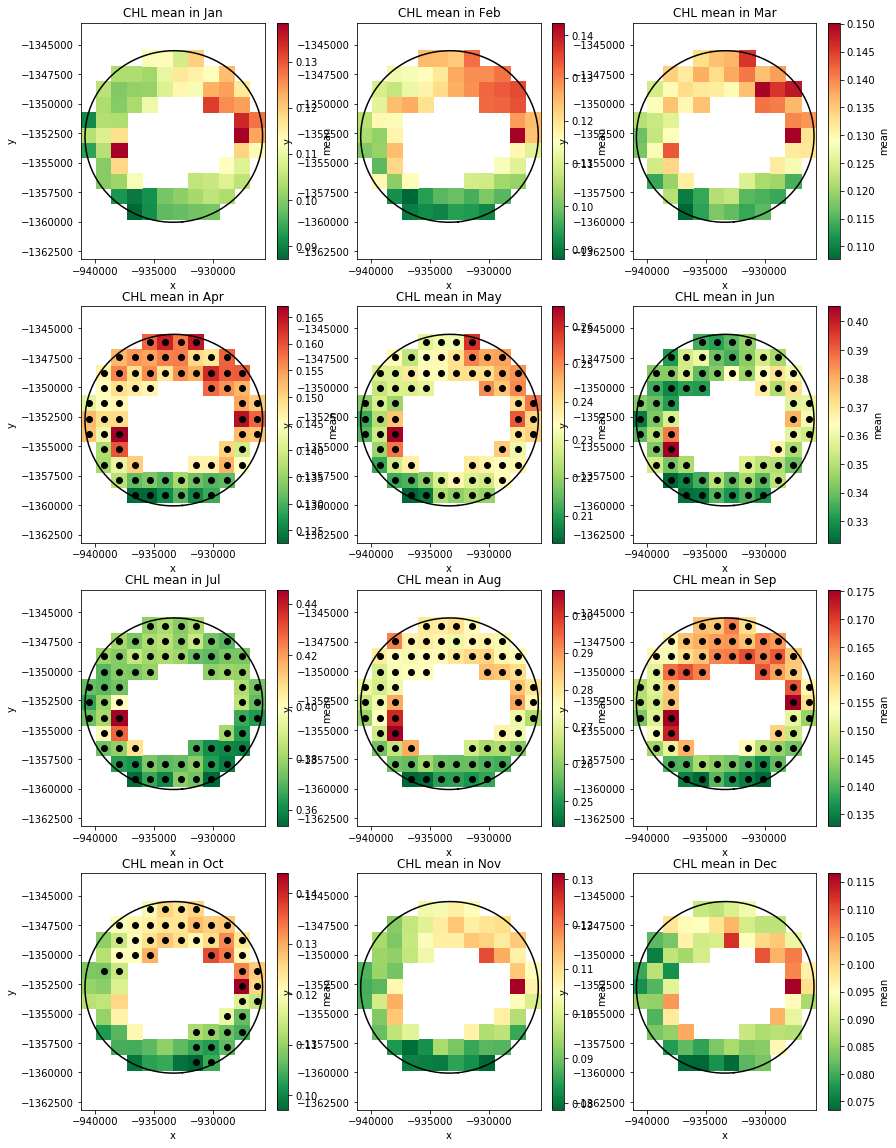

In [102]:
import shapefile as shpf
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
LH = shpf.Reader(poly_path)
plt.figure(figsize=(14,20))

plt.subplot(4,3,1)
JanCHLData['mean'].plot(cmap='RdYlGn_r')
plt.title('CHL mean in Jan')
plt.axis('equal')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
tempDF =JanCHLDF[JanCHLDF['freq'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')

plt.subplot(4,3,2)
FebCHLData['mean'].plot(cmap='RdYlGn_r')
plt.title('CHL mean in Feb')
plt.axis('equal')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
tempDF =FebCHLDF[FebCHLDF['freq'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')

plt.subplot(4,3,3)
MarCHLData['mean'].plot(cmap='RdYlGn_r')
plt.title('CHL mean in Mar')
plt.axis('equal')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
tempDF =MarCHLDF[MarCHLDF['freq'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')

plt.subplot(4,3,4)
AprCHLData['mean'].plot(cmap='RdYlGn_r')
plt.title('CHL mean in Apr')
plt.axis('equal')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
tempDF = AprCHLDF[AprCHLDF['freq'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')

plt.subplot(4,3,5)
MayCHLData['mean'].plot(cmap='RdYlGn_r')
plt.title('CHL mean in May')
plt.axis('equal')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
tempDF =MayCHLDF[MayCHLDF['freq'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')

plt.subplot(4,3,6)
JunCHLData['mean'].plot(cmap='RdYlGn_r')
plt.title('CHL mean in Jun')
plt.axis('equal')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
tempDF =JunCHLDF[JunCHLDF['freq'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')

plt.subplot(4,3,7)
JulCHLData['mean'].plot(cmap='RdYlGn_r')
plt.title('CHL mean in Jul')
plt.axis('equal')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
tempDF =JulCHLDF[JulCHLDF['freq'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')

plt.subplot(4,3,8)
AugCHLData['mean'].plot(cmap='RdYlGn_r')
plt.title('CHL mean in Aug')
plt.axis('equal')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
tempDF =AugCHLDF[AugCHLDF['freq'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')

plt.subplot(4,3,9)
SepCHLData['mean'].plot(cmap='RdYlGn_r')
plt.title('CHL mean in Sep')
plt.axis('equal')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
tempDF =SepCHLDF[SepCHLDF['freq'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')

plt.subplot(4,3,10)
OctCHLData['mean'].plot(cmap='RdYlGn_r')
plt.title('CHL mean in Oct')
plt.axis('equal')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
tempDF =OctCHLDF[OctCHLDF['freq'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')

plt.subplot(4,3,11)
NovCHLData['mean'].plot(cmap='RdYlGn_r')
plt.title('CHL mean in Nov')
plt.axis('equal')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
tempDF =NovCHLDF[NovCHLDF['freq'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')

plt.subplot(4,3,12)
DecCHLData['mean'].plot(cmap='RdYlGn_r')
plt.title('CHL mean in Dec')
plt.axis('equal')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
tempDF =DecCHLDF[DecCHLDF['freq'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')    


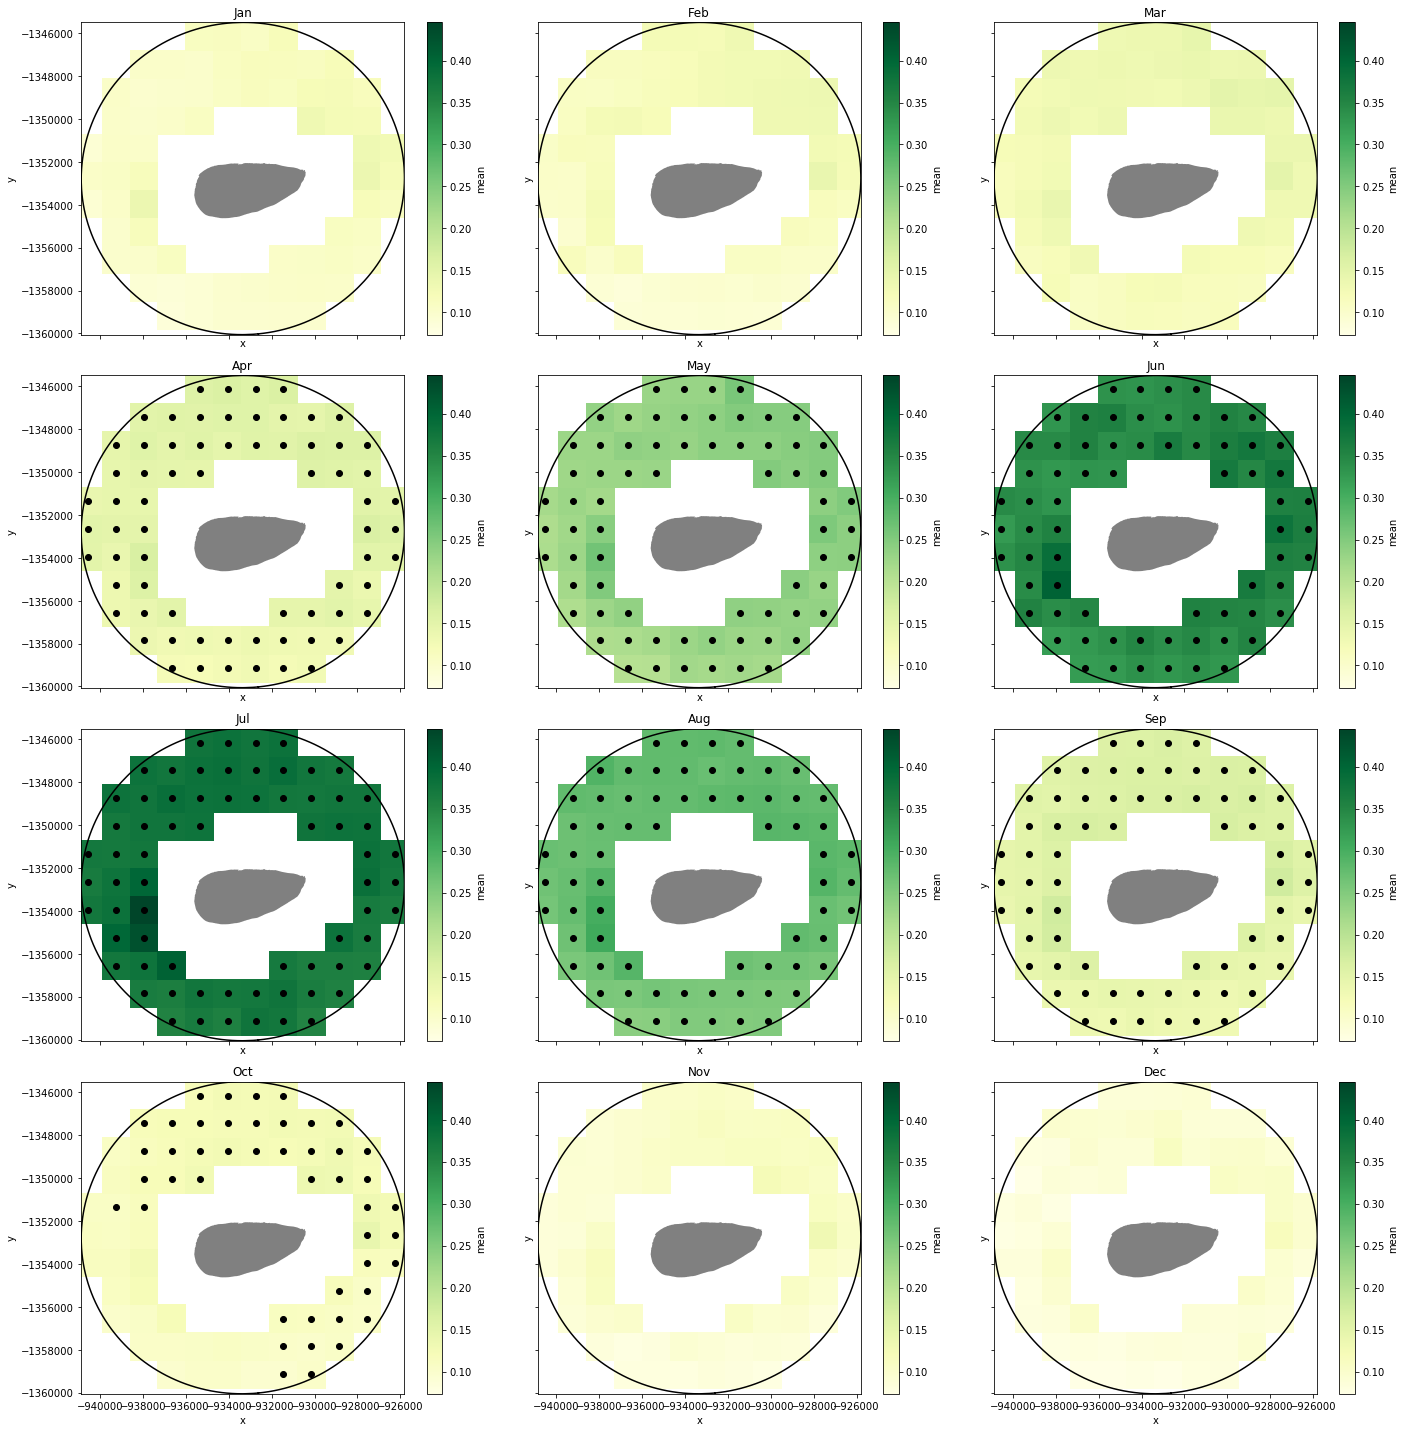

In [174]:
import shapefile as shpf
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
LH = shpf.Reader(poly_path)

x=[JanCHLData['mean'].min().values,FebCHLData['mean'].min().values,
  MarCHLData['mean'].min().values,AprCHLData['mean'].min().values,
  MayCHLData['mean'].min().values,JunCHLData['mean'].min().values,
  JulCHLData['mean'].min().values,AugCHLData['mean'].min().values,
  SepCHLData['mean'].min().values,OctCHLData['mean'].min().values,
  NovCHLData['mean'].min().values,DecCHLData['mean'].min().values]
minV = min(x)
x=[JanCHLData['mean'].max().values,FebCHLData['mean'].max().values,
  MarCHLData['mean'].max().values,AprCHLData['mean'].max().values,
  MayCHLData['mean'].max().values,JunCHLData['mean'].max().values,
  JulCHLData['mean'].max().values,AugCHLData['mean'].max().values,
  SepCHLData['mean'].max().values,OctCHLData['mean'].max().values,
  NovCHLData['mean'].max().values,DecCHLData['mean'].max().values]
maxV = max(x)
if maxV < 0:
    colormap = 'YlGn'
if minV > 0:
    colormap = 'YlGn'
if (minV < 0)&(maxV > 0):
    colormap = 'RdYlGn_r'
    minV = max(abs(minV),maxV) * -1
    maxV = max(abs(minV),maxV)

    
f, axes = plt.subplots(4,3,sharex='all',sharey='all',figsize=(20,20))

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[0,0])
JanCHLData['mean'].plot(cmap=colormap,ax=axes[0,0],vmin=minV,vmax=maxV)
axes[0,0].set_title('Jan')
tempDF = JanCHLDF[JanCHLDF['freq'] >= 0.3]
x = tempDF['x']
y = tempDF['y']
axes[0,0].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[0,0].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[0,1])
FebCHLData['mean'].plot(cmap=colormap,ax=axes[0,1],vmin=minV,vmax=maxV)
axes[0,1].set_title('Feb')
tempDF = FebCHLDF[FebCHLDF['freq'] >= 0.3]
x = tempDF['x']
y = tempDF['y']
axes[0,1].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[0,1].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[0,2])
MarCHLData['mean'].plot(cmap=colormap,ax=axes[0,2],vmin=minV,vmax=maxV)
axes[0,2].set_title('Mar')
tempDF = MarCHLDF[MarCHLDF['freq'] >= 0.3]
x = tempDF['x']
y = tempDF['y']
axes[0,2].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[0,2].plot(x, y, 'k')
    
shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[1,0])
AprCHLData['mean'].plot(cmap=colormap,ax=axes[1,0],vmin=minV,vmax=maxV)
axes[1,0].set_title('Apr')
tempDF = AprCHLDF[AprCHLDF['freq'] >= 0.3]
x = tempDF['x']
y = tempDF['y']
axes[1,0].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[1,0].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[1,1])
MayCHLData['mean'].plot(cmap=colormap,ax=axes[1,1],vmin=minV,vmax=maxV)
axes[1,1].set_title('May')
tempDF = MayCHLDF[MayCHLDF['freq'] >= 0.3]
x = tempDF['x']
y = tempDF['y']
axes[1,1].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[1,1].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[1,2])
JunCHLData['mean'].plot(cmap=colormap,ax=axes[1,2],vmin=minV,vmax=maxV)
axes[1,2].set_title('Jun')
tempDF = JunCHLDF[JunCHLDF['freq'] >= 0.3]
x = tempDF['x']
y = tempDF['y']
axes[1,2].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[1,2].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[2,0])
JulCHLData['mean'].plot(cmap=colormap,ax=axes[2,0],vmin=minV,vmax=maxV)
axes[2,0].set_title('Jul')
tempDF = JulCHLDF[JulCHLDF['freq'] >= 0.3]
x = tempDF['x']
y = tempDF['y']
axes[2,0].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[2,0].plot(x, y, 'k')
    
shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[2,1])
AugCHLData['mean'].plot(cmap=colormap,ax=axes[2,1],vmin=minV,vmax=maxV)
axes[2,1].set_title('Aug')
tempDF = AugCHLDF[AugCHLDF['freq'] >= 0.3]
x = tempDF['x']
y = tempDF['y']
axes[2,1].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[2,1].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[2,2])
SepCHLData['mean'].plot(cmap=colormap,ax=axes[2,2],vmin=minV,vmax=maxV)
axes[2,2].set_title('Sep')
tempDF = SepCHLDF[SepCHLDF['freq'] >= 0.3]
x = tempDF['x']
y = tempDF['y']
axes[2,2].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[2,2].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[3,0])
OctCHLData['mean'].plot(cmap=colormap,ax=axes[3,0],vmin=minV,vmax=maxV)
axes[3,0].set_title('Oct')
tempDF = OctCHLDF[OctCHLDF['freq'] >= 0.3]
x = tempDF['x']
y = tempDF['y']
axes[3,0].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[3,0].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[3,1])
NovCHLData['mean'].plot(cmap=colormap,ax=axes[3,1],vmin=minV,vmax=maxV)
axes[3,1].set_title('Nov')
tempDF = NovCHLDF[NovCHLDF['freq'] >= 0.3]
x = tempDF['x']
y = tempDF['y']
axes[3,1].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[3,1].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[3,2])
DecCHLData['mean'].plot(cmap=colormap,ax=axes[3,2],vmin=minV,vmax=maxV)
axes[3,2].set_title('Dec')
tempDF = DecCHLDF[DecCHLDF['freq'] >= 0.3]
x = tempDF['x']
y = tempDF['y']
axes[3,2].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[3,2].plot(x, y, 'k')
    
xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)

axes[0,0].axis([xmin,xmax,ymin,ymax])
f.tight_layout()    
plt.show()

**function for generating annual time-series of seasonal mean for each valid pixel**

In [103]:
def yearseasonCHL(season):
    tempDF = pd.DataFrame()
    for col in chlDF.columns:
        
        if col.isdigit():
            
            nuData = chlDF.index.size - np.isnan(chlDF[col]).sum()
            if nuData > 0:
                x = chlDF[chlDF['season'] == season]
                y = x[col].groupby(x['year'])
                
                xDF = y.describe() # a DataFrame containing the results of the groupby operation
                tempDF[col] = xDF['mean'] # only interest in the mean statists
                
    return tempDF

In [104]:
yearwinterDF = yearseasonCHL('winter')
yearspringDF = yearseasonCHL('spring')
yearsummerDF = yearseasonCHL('summer')
yearautumnDF = yearseasonCHL('autumn')

In [105]:
# years 2002 and 2019 do not contain a full summer season
# summer months 12, 1 and 2 expand two years, this is another issue
yearsummerDF1 = yearsummerDF.loc['2003':'2018']

In [65]:
yearwinterDF

,17,18,19,20,27,28,29,30,31,32,...,127,128,129,130,136,137,138,139,140,141
year,,,,,,,,,,,,,,,,,,,,,
2002,0.242276,0.261276,0.251538,0.252896,0.240591,0.245407,0.275623,0.273692,0.249802,0.241978,...,0.230243,0.227008,0.229282,0.234335,0.205776,0.206861,0.214905,0.217255,0.213460,0.221094
2003,0.317317,0.314792,0.318754,0.308801,0.316681,0.307883,0.319118,0.315578,0.312057,0.321947,...,0.281731,0.290346,0.286259,0.280664,0.269704,0.272309,0.275563,0.275419,0.273431,0.269478
2004,0.359036,0.367522,0.361956,0.473169,0.376784,0.477791,0.360617,0.360782,0.342404,0.446429,...,0.445858,0.454357,0.351543,0.337407,0.364663,0.366324,0.363899,0.384580,0.384335,0.320374
2005,0.288579,0.302354,0.308351,0.332125,0.294739,0.284323,0.322805,0.299159,0.310309,0.306907,...,0.300473,0.293155,0.292205,0.313055,0.261866,0.276375,0.284390,0.282696,0.276128,0.275274
2006,0.414489,0.410878,0.405811,0.419990,0.401422,0.401483,0.412445,0.422679,0.406358,0.422038,...,0.393863,0.425024,0.416660,0.415709,0.402077,0.415497,0.390965,0.396620,0.434873,0.443245
2007,0.304858,0.299743,0.304964,0.292107,0.289040,0.309610,0.322700,0.329364,0.316427,0.313025,...,0.276601,0.296865,0.285636,0.283919,0.273180,0.266189,0.270972,0.278637,0.281797,0.275523
2008,0.370926,0.364989,0.382338,0.368283,0.365800,0.362022,0.383081,0.377313,0.379150,0.369244,...,0.359321,0.367307,0.362258,0.368194,0.362300,0.353114,0.358696,0.348964,0.356739,0.365226
2009,0.224452,0.238586,0.232833,0.230776,0.219395,0.217584,0.228230,0.242263,0.227633,0.240544,...,0.241490,0.240932,0.239626,0.240024,0.219426,0.229762,0.233387,0.254222,0.246161,0.242450
2010,0.286608,0.289219,0.286637,0.280783,0.289085,0.302712,0.279801,0.284539,0.282352,0.287253,...,0.310436,0.316235,0.303268,0.302947,0.292288,0.299126,0.326097,0.295707,0.298338,0.305069


**function for calculating trends of annual time-series of seasonal mean for each valid pixel**

In [106]:
import statsmodels.formula.api as sm
def yearseasonTrend(yearseasonDF,season):
    ind = np.arange(1,yearseasonDF.index.size+1,1)
    yearseasonDF['ind'] = ind
    yearseasonRateDF = pd.DataFrame()
    idList = []
    rateList = []
    pValueList = []
    for col in yearseasonDF.columns:
        
        if col.isdigit():
            idList.append(col)
            x = yearseasonDF.index.size - np.isnan(yearseasonDF[col]).sum()
            f = x/yearseasonDF.index.size
            if f > 0.5:
                
                # note the Q() function for the proper handling of the number as a column name
                formula = 'Q("' + col + '")' + ' ~ ind'

                fit = sm.ols(formula=formula, data=yearseasonDF, missing='drop').fit()

                predict = fit.predict(yearseasonDF)
                yearseasonDF['fitted'] = predict
                rate = round(fit.params[1],3)
                pValue = round(fit.pvalues[1],2)
            else:
                rate = np.nan
                pValue = np.nan

            rateList.append(rate)
            pValueList.append(pValue)
        else:
            break
    yearseasonRateDF['id'] = idList
    yearseasonRateDF['rate'] = rateList
    yearseasonRateDF['pValue'] = pValueList

    countList = []
    freqList = []
    tempDF = chlDF[chlDF['season'] == season]
    
    for col in yearseasonDF.columns:
        
        if col.isdigit():        
            x = tempDF.index.size - np.isnan(tempDF[col]).sum()
            
                      
            f = x/tempDF.index.size
           
            countList.append(x)
            freqList.append(f)
        else:
            break
    yearseasonRateDF['count'] = countList
    yearseasonRateDF['frequency'] = freqList
    yearseasonRateDF.set_index("id",inplace=True)
    
    return yearseasonRateDF

In [107]:
yearwinterRateDF = yearseasonTrend(yearwinterDF,'winter')
yearspringRateDF = yearseasonTrend(yearspringDF,'spring')
yearsummerRateDF = yearseasonTrend(yearsummerDF1,'summer')
yearautumnRateDF = yearseasonTrend(yearautumnDF,'autumn')

/g/data/v10/public/modules/dea-env/20191127/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/g/data/v10/public/modules/dea-env/20191127/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [68]:
yearsummerRateDF

,rate,pValue,count,frequency
id,,,,
17,-0.001,0.52,185,0.120757
18,-0.000,0.92,186,0.121410
19,-0.002,0.09,185,0.120757
20,0.000,0.82,189,0.123368
27,-0.001,0.55,178,0.116188
...,...,...,...,...
137,0.001,0.60,184,0.120104
138,-0.000,0.88,178,0.116188
139,0.000,0.96,189,0.123368


In [108]:
xList = []
yList = []
for id in yearsummerRateDF.index:
    x = int(latlonDF.loc[id]['lon'])
    y = int(latlonDF.loc[id]['lat'])
    xList.append(x)
    yList.append(y)
yearsummerRateDF['x'] = xList
yearsummerRateDF['y'] = yList
yearspringRateDF['x'] = xList
yearspringRateDF['y'] = yList
yearautumnRateDF['x'] = xList
yearautumnRateDF['y'] = yList
yearwinterRateDF['x'] = xList
yearwinterRateDF['y'] = yList


In [109]:
import xarray as xr
yearsummerRateDF1 = yearsummerRateDF.copy()
yearsummerRateDF1.set_index(['y','x'],inplace=True)
yearsummerRateData = xr.Dataset.from_dataframe(yearsummerRateDF1)
yearsummerRateData.attrs['crs']='EPSG:3577'
yearsummerRateData.to_netcdf(path='/home/547/zxh547/dea-notebooks/yearsummerRateData_CHL.nc')

import xarray as xr
yearspringRateDF1 = yearspringRateDF.copy()
yearspringRateDF1.set_index(['y','x'],inplace=True)
yearspringRateData = xr.Dataset.from_dataframe(yearspringRateDF1)
yearspringRateData.attrs['crs']='EPSG:3577'
yearspringRateData.to_netcdf(path='/home/547/zxh547/dea-notebooks/yearspringRateData_CHL.nc')

import xarray as xr
yearautumnRateDF1 = yearautumnRateDF.copy()
yearautumnRateDF1.set_index(['y','x'],inplace=True)
yearautumnRateData = xr.Dataset.from_dataframe(yearautumnRateDF1)
yearautumnRateData.attrs['crs']='EPSG:3577'
yearautumnRateData.to_netcdf(path='/home/547/zxh547/dea-notebooks/yearautumnRateData_CHL.nc')

import xarray as xr
yearwinterRateDF1 = yearwinterRateDF.copy()
yearwinterRateDF1.set_index(['y','x'],inplace=True)
yearwinterRateData = xr.Dataset.from_dataframe(yearwinterRateDF1)
yearwinterRateData.attrs['crs']='EPSG:3577'
yearwinterRateData.to_netcdf(path='/home/547/zxh547/dea-notebooks/yearwinterRateData_CHL.nc')

In [71]:
yearwinterRateData

<xarray.Dataset>
Dimensions:    (x: 12, y: 11)
Coordinates:
  * y          (y) int64 -1359150 -1357850 -1356550 ... -1347450 -1346150
  * x          (x) int64 -940550 -939250 -937950 ... -928850 -927550 -926250
Data variables:
    rate       (y, x) float64 nan nan nan 0.003 0.004 ... 0.001 nan nan nan nan
    pValue     (y, x) float64 nan nan nan 0.26 0.19 ... 0.65 nan nan nan nan
    count      (y, x) float64 nan nan nan 881.0 881.0 ... 860.0 nan nan nan nan
    frequency  (y, x) float64 nan nan nan 0.5608 0.5608 ... nan nan nan nan
Attributes:
    crs:      EPSG:3577

**display spatial patterns of annual trends of seasonal means; the black dots indicate statistical signficance at 90% confidence level**

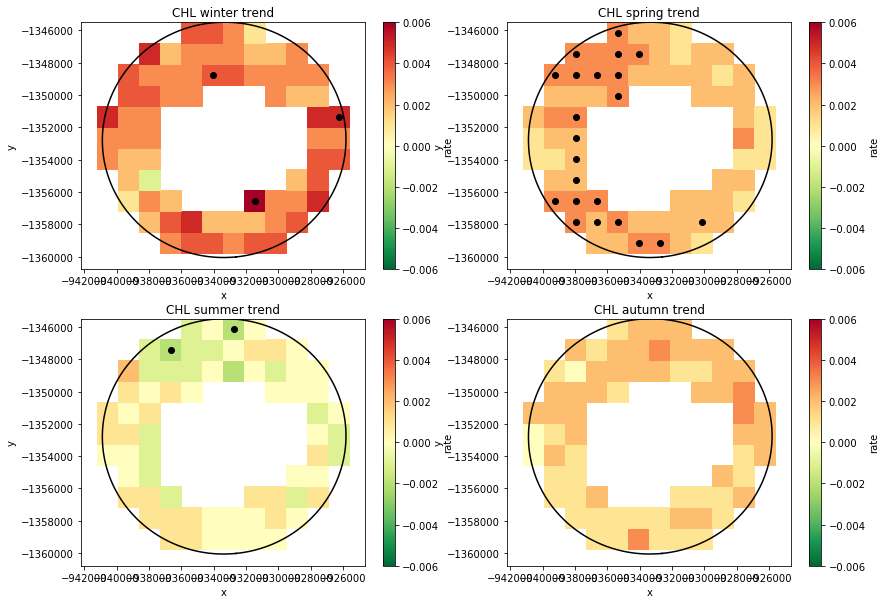

In [117]:
import shapefile as shpf
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
LH = shpf.Reader(poly_path)

x=[yearwinterRateData['rate'].min().values,yearsummerRateData['rate'].min().values,
  yearspringRateData['rate'].min().values,yearautumnRateData['rate'].min().values]
minV = min(x)
x=[yearwinterRateData['rate'].max().values,yearsummerRateData['rate'].max().values,
  yearspringRateData['rate'].max().values,yearautumnRateData['rate'].max().values]
maxV = max(x)
if maxV < 0:
    colormap = 'YlGn'
if minV > 0:
    colormap = 'YlGn'
if (minV < 0)&(maxV > 0):
    colormap = 'RdYlGn_r'
    minV = max(abs(minV),maxV) * -1
    maxV = max(abs(minV),maxV)

plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
yearwinterRateData['rate'].plot(cmap=colormap,vmin=minV,vmax=maxV)
plt.title('CHL winter trend')
plt.axis('equal')
#yearwinterRateDF.plot.scatter('y','x',c='pValue')
tempDF = yearwinterRateDF[yearwinterRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
#pValue = yearwinterRateDF['pValue']
plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')

plt.subplot(2,2,2)
yearspringRateData['rate'].plot(cmap=colormap,vmin=minV,vmax=maxV)
plt.title('CHL spring trend')
plt.axis('equal')
#yearwinterRateDF.plot.scatter('y','x',c='pValue')
tempDF = yearspringRateDF[yearspringRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
#pValue = yearwinterRateDF['pValue']
plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
    
plt.subplot(2,2,3)
yearsummerRateData['rate'].plot(cmap=colormap,vmin=minV,vmax=maxV)
plt.title('CHL summer trend')
plt.axis('equal')
#yearwinterRateDF.plot.scatter('y','x',c='pValue')
tempDF = yearsummerRateDF[yearsummerRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
#pValue = yearwinterRateDF['pValue']
plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
    
plt.subplot(2,2,4)
yearautumnRateData['rate'].plot(cmap=colormap,vmin=minV,vmax=maxV)
plt.title('CHL autumn trend')
plt.axis('equal')
#yearwinterRateDF.plot.scatter('y','x',c='pValue')
tempDF = yearautumnRateDF[yearautumnRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
#pValue = yearwinterRateDF['pValue']
plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')
    
plt.show()

In [73]:
yearspringRateDF

,rate,pValue,count,frequency,x,y
id,,,,,,
17,0.003,0.08,544,0.351648,-935350,-1346150
18,0.002,0.12,539,0.348416,-934050,-1346150
19,0.002,0.14,547,0.353588,-932750,-1346150
20,0.001,0.43,559,0.361345,-931450,-1346150
27,0.003,0.06,544,0.351648,-937950,-1347450
...,...,...,...,...,...,...
137,0.002,0.12,517,0.334195,-935350,-1359150
138,0.003,0.07,524,0.338720,-934050,-1359150
139,0.003,0.09,519,0.335488,-932750,-1359150


**the same as above, except sharing X and Y axes**

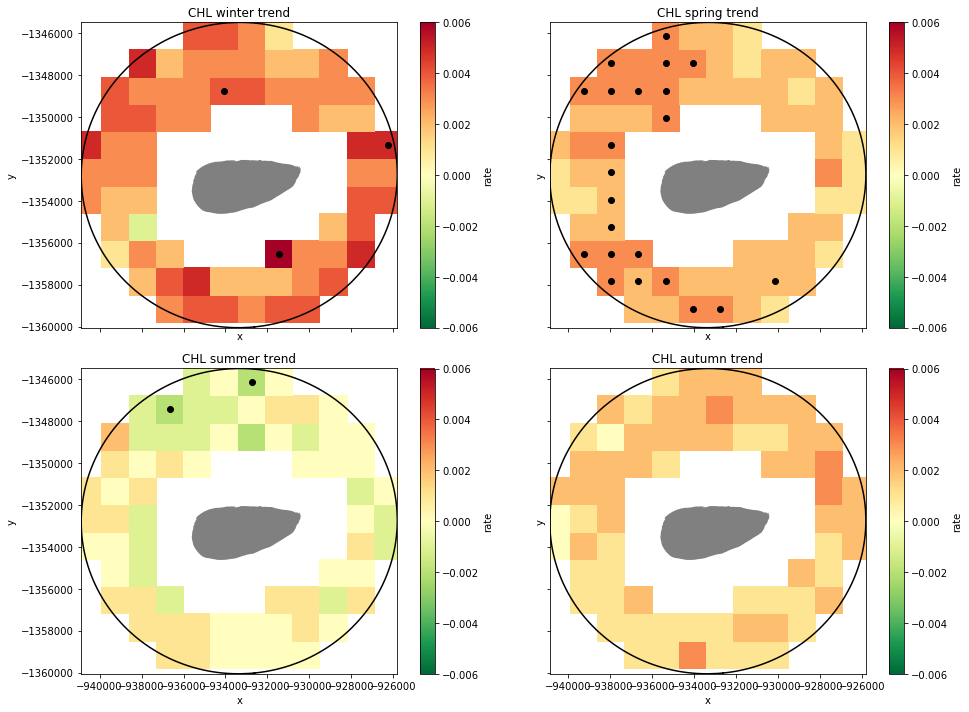

In [121]:
import shapefile as shpf
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
LH = shpf.Reader(poly_path)

x=[yearwinterRateData['rate'].min().values,yearsummerRateData['rate'].min().values,
  yearspringRateData['rate'].min().values,yearautumnRateData['rate'].min().values]
minV = min(x)
x=[yearwinterRateData['rate'].max().values,yearsummerRateData['rate'].max().values,
  yearspringRateData['rate'].max().values,yearautumnRateData['rate'].max().values]
maxV = max(x)
if maxV < 0:
    colormap = 'YlGn'
if minV > 0:
    colormap = 'YlGn'
if (minV < 0)&(maxV > 0):
    colormap = 'RdYlGn_r'
    minV = max(abs(minV),maxV) * -1
    maxV = max(abs(minV),maxV)


f, axes = plt.subplots(2,2,sharex='all',sharey='all',figsize=(14,10))

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(figsize=(10,10),color='gray',ax=axes[0,0])

yearwinterRateData['rate'].plot(cmap=colormap,ax=axes[0,0],vmin=minV,vmax=maxV)
axes[0,0].set_title('CHL winter trend')
#axes[0,0].axis('equal')

tempDF = yearwinterRateDF[yearwinterRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']

axes[0,0].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[0,0].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(figsize=(10,10),color='gray',ax=axes[0,1])
yearspringRateData['rate'].plot(cmap=colormap,ax=axes[0,1],vmin=minV,vmax=maxV)
axes[0,1].set_title('CHL spring trend')
#axes[0,1].axis('equal')

tempDF = yearspringRateDF[yearspringRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']

axes[0,1].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[0,1].plot(x, y, 'k')
    
shape_plot = gpd.read_file(reef_path)
shape_plot.plot(figsize=(10,10),color='gray',ax=axes[1,0])
yearsummerRateData['rate'].plot(cmap=colormap,ax=axes[1,0],vmin=minV,vmax=maxV)
axes[1,0].set_title('CHL summer trend')
#axes[1,0].axis('equal')

tempDF = yearsummerRateDF[yearsummerRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']

axes[1,0].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[1,0].plot(x, y, 'k')
    
shape_plot = gpd.read_file(reef_path)
shape_plot.plot(figsize=(10,10),color='gray',ax=axes[1,1])
yearautumnRateData['rate'].plot(cmap=colormap,ax=axes[1,1],vmin=minV,vmax=maxV)
axes[1,1].set_title('CHL autumn trend')
#axes[1,1].axis('equal')

tempDF = yearautumnRateDF[yearautumnRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
axes[1,1].scatter(x,y,c='black')

for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]    
    axes[1,1].plot(x, y, 'k')

xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)
#xmin = yearautumnRateData.x.min()
#xmax = yearautumnRateData.x.max()
#ymin = yearautumnRateData.y.min()
#ymax = yearautumnRateData.y.max()
#axes[0,0].axis([-942000,-924000,-1362000,-1344000])
axes[0,0].axis([xmin,xmax,ymin,ymax])
f.tight_layout()    
plt.show()

**function for generating annual time-series of monthly mean for each valid pixel**

In [122]:
def yearmonthCHL(month):
    tempDF = pd.DataFrame()
    for col in chlDF.columns:
        
        if col.isdigit():
            
            nuData = chlDF.index.size - np.isnan(chlDF[col]).sum()
            if nuData > 0:
                x = chlDF[chlDF['month'] == month]
                y = x[col].groupby(x['year'])
                
                xDF = y.describe() # a DataFrame containing the results of the groupby operation
                tempDF[col] = xDF['mean'] # only interest in the mean statists
                
    return tempDF

**function for calculating trends of annual time-series of monthly mean for each valid pixel**

In [123]:
import statsmodels.formula.api as sm
def yearmonthTrend(yearmonthDF,month):
    ind = np.arange(1,yearmonthDF.index.size+1,1)
    yearmonthDF['ind'] = ind
    yearmonthRateDF = pd.DataFrame()
    idList = []
    rateList = []
    pValueList = []
    for col in yearmonthDF.columns:
        
        if col.isdigit():
            idList.append(col)
            x = yearmonthDF.index.size - np.isnan(yearmonthDF[col]).sum()
            f = x/yearmonthDF.index.size
            # only calculate trend when the observation frequency is greater than 50%
            if f > 0.5:
                
                # note the Q() function for the proper handling of the number as a column name
                formula = 'Q("' + col + '")' + ' ~ ind'

                fit = sm.ols(formula=formula, data=yearmonthDF, missing='drop').fit()

                predict = fit.predict(yearmonthDF)
                yearmonthDF['fitted'] = predict
                rate = round(fit.params[1],3)
                pValue = round(fit.pvalues[1],2)
            else:
                rate = np.nan
                pValue = np.nan

            rateList.append(rate)
            pValueList.append(pValue)
        else:
            break
    yearmonthRateDF['id'] = idList
    yearmonthRateDF['rate'] = rateList
    yearmonthRateDF['pValue'] = pValueList

    countList = []
    freqList = []
    tempDF = chlDF[chlDF['month'] == month]
    
    for col in yearmonthDF.columns:
        
        if col.isdigit():        
            x = tempDF.index.size - np.isnan(tempDF[col]).sum()
            
                      
            f = x/tempDF.index.size
           
            countList.append(x)
            freqList.append(f)
        else:
            break
    yearmonthRateDF['count'] = countList
    yearmonthRateDF['frequency'] = freqList
    yearmonthRateDF.set_index("id",inplace=True)
    
    return yearmonthRateDF

**calculate annual time-series of monthly means and their trends**

In [124]:
yearJanDF = yearmonthCHL('01')
yearJanRateDF = yearmonthTrend(yearJanDF,'01')
yearFebDF = yearmonthCHL('02')
yearFebRateDF = yearmonthTrend(yearFebDF,'02')
yearMarDF = yearmonthCHL('03')
yearMarRateDF = yearmonthTrend(yearMarDF,'03')
yearAprDF = yearmonthCHL('04')
yearAprRateDF = yearmonthTrend(yearAprDF,'04')
yearMayDF = yearmonthCHL('05')
yearMayRateDF = yearmonthTrend(yearMayDF,'05')
yearJunDF = yearmonthCHL('06')
yearJunRateDF = yearmonthTrend(yearJunDF,'06')
yearJulDF = yearmonthCHL('07')
yearJulRateDF = yearmonthTrend(yearJulDF,'07')
yearAugDF = yearmonthCHL('08')
yearAugRateDF = yearmonthTrend(yearAugDF,'08')
yearSepDF = yearmonthCHL('09')
yearSepRateDF = yearmonthTrend(yearSepDF,'09')
yearOctDF = yearmonthCHL('10')
yearOctRateDF = yearmonthTrend(yearOctDF,'10')
yearNovDF = yearmonthCHL('11')
yearNovRateDF = yearmonthTrend(yearNovDF,'11')
yearDecDF = yearmonthCHL('12')
yearDecRateDF = yearmonthTrend(yearDecDF,'12')

In [79]:
yearFebRateDF

,rate,pValue,count,frequency
id,,,,
17,-0.003,0.19,75,0.156250
18,-0.003,0.15,77,0.160417
19,-0.004,0.05,79,0.164583
20,-0.002,0.29,76,0.158333
27,-0.002,0.13,76,0.158333
...,...,...,...,...
137,0.001,0.48,73,0.152083
138,0.001,0.68,69,0.143750
139,0.002,0.18,73,0.152083


In [125]:
xList = []
yList = []
for id in yearJanRateDF.index:
    x = int(latlonDF.loc[id]['lon'])
    y = int(latlonDF.loc[id]['lat'])
    xList.append(x)
    yList.append(y)
yearJanRateDF['x'] = xList
yearJanRateDF['y'] = yList
yearFebRateDF['x'] = xList
yearFebRateDF['y'] = yList
yearMarRateDF['x'] = xList
yearMarRateDF['y'] = yList
yearAprRateDF['x'] = xList
yearAprRateDF['y'] = yList
yearMayRateDF['x'] = xList
yearMayRateDF['y'] = yList
yearJunRateDF['x'] = xList
yearJunRateDF['y'] = yList
yearJulRateDF['x'] = xList
yearJulRateDF['y'] = yList
yearAugRateDF['x'] = xList
yearAugRateDF['y'] = yList
yearSepRateDF['x'] = xList
yearSepRateDF['y'] = yList
yearOctRateDF['x'] = xList
yearOctRateDF['y'] = yList
yearNovRateDF['x'] = xList
yearNovRateDF['y'] = yList
yearDecRateDF['x'] = xList
yearDecRateDF['y'] = yList


In [126]:
import xarray as xr
yearJanRateDF1 = yearJanRateDF.copy()
yearJanRateDF1.set_index(['y','x'],inplace=True)
yearJanRateData = xr.Dataset.from_dataframe(yearJanRateDF1)
yearJanRateData.attrs['crs']='EPSG:3577'
yearJanRateData.to_netcdf(path='/home/547/zxh547/dea-notebooks/yearJanRateData_CHL.nc')

import xarray as xr
yearFebRateDF1 = yearFebRateDF.copy()
yearFebRateDF1.set_index(['y','x'],inplace=True)
yearFebRateData = xr.Dataset.from_dataframe(yearFebRateDF1)
yearFebRateData.attrs['crs']='EPSG:3577'
yearFebRateData.to_netcdf(path='/home/547/zxh547/dea-notebooks/yearFebRateData_CHL.nc')

import xarray as xr
yearMarRateDF1 = yearMarRateDF.copy()
yearMarRateDF1.set_index(['y','x'],inplace=True)
yearMarRateData = xr.Dataset.from_dataframe(yearMarRateDF1)
yearMarRateData.attrs['crs']='EPSG:3577'
yearMarRateData.to_netcdf(path='/home/547/zxh547/dea-notebooks/yearMarRateData_CHL.nc')

import xarray as xr
yearAprRateDF1 = yearAprRateDF.copy()
yearAprRateDF1.set_index(['y','x'],inplace=True)
yearAprRateData = xr.Dataset.from_dataframe(yearAprRateDF1)
yearAprRateData.attrs['crs']='EPSG:3577'
yearAprRateData.to_netcdf(path='/home/547/zxh547/dea-notebooks/yearAprRateData_CHL.nc')

import xarray as xr
yearMayRateDF1 = yearMayRateDF.copy()
yearMayRateDF1.set_index(['y','x'],inplace=True)
yearMayRateData = xr.Dataset.from_dataframe(yearMayRateDF1)
yearMayRateData.attrs['crs']='EPSG:3577'
yearMayRateData.to_netcdf(path='/home/547/zxh547/dea-notebooks/yearMayRateData_CHL.nc')

import xarray as xr
yearJunRateDF1 = yearJunRateDF.copy()
yearJunRateDF1.set_index(['y','x'],inplace=True)
yearJunRateData = xr.Dataset.from_dataframe(yearJunRateDF1)
yearJunRateData.attrs['crs']='EPSG:3577'
yearJunRateData.to_netcdf(path='/home/547/zxh547/dea-notebooks/yearJunRateData_CHL.nc')

import xarray as xr
yearJulRateDF1 = yearJulRateDF.copy()
yearJulRateDF1.set_index(['y','x'],inplace=True)
yearJulRateData = xr.Dataset.from_dataframe(yearJulRateDF1)
yearJulRateData.attrs['crs']='EPSG:3577'
yearJulRateData.to_netcdf(path='/home/547/zxh547/dea-notebooks/yearJulRateData_CHL.nc')

import xarray as xr
yearAugRateDF1 = yearAugRateDF.copy()
yearAugRateDF1.set_index(['y','x'],inplace=True)
yearAugRateData = xr.Dataset.from_dataframe(yearAugRateDF1)
yearAugRateData.attrs['crs']='EPSG:3577'
yearAugRateData.to_netcdf(path='/home/547/zxh547/dea-notebooks/yearAugRateData_CHL.nc')

import xarray as xr
yearSepRateDF1 = yearSepRateDF.copy()
yearSepRateDF1.set_index(['y','x'],inplace=True)
yearSepRateData = xr.Dataset.from_dataframe(yearSepRateDF1)
yearSepRateData.attrs['crs']='EPSG:3577'
yearSepRateData.to_netcdf(path='/home/547/zxh547/dea-notebooks/yearSepRateData_CHL.nc')

import xarray as xr
yearOctRateDF1 = yearOctRateDF.copy()
yearOctRateDF1.set_index(['y','x'],inplace=True)
yearOctRateData = xr.Dataset.from_dataframe(yearOctRateDF1)
yearOctRateData.attrs['crs']='EPSG:3577'
yearOctRateData.to_netcdf(path='/home/547/zxh547/dea-notebooks/yearOctRateData_CHL.nc')

import xarray as xr
yearNovRateDF1 = yearNovRateDF.copy()
yearNovRateDF1.set_index(['y','x'],inplace=True)
yearNovRateData = xr.Dataset.from_dataframe(yearNovRateDF1)
yearNovRateData.attrs['crs']='EPSG:3577'
yearNovRateData.to_netcdf(path='/home/547/zxh547/dea-notebooks/yearNovRateData_CHL.nc')

import xarray as xr
yearDecRateDF1 = yearDecRateDF.copy()
yearDecRateDF1.set_index(['y','x'],inplace=True)
yearDecRateData = xr.Dataset.from_dataframe(yearDecRateDF1)
yearDecRateData.attrs['crs']='EPSG:3577'
yearDecRateData.to_netcdf(path='/home/547/zxh547/dea-notebooks/yearDecRateData_CHL.nc')

**display spatial patterns of annual trends of monthly means; the black dots indicate statistical signficance at 90% confidence level**

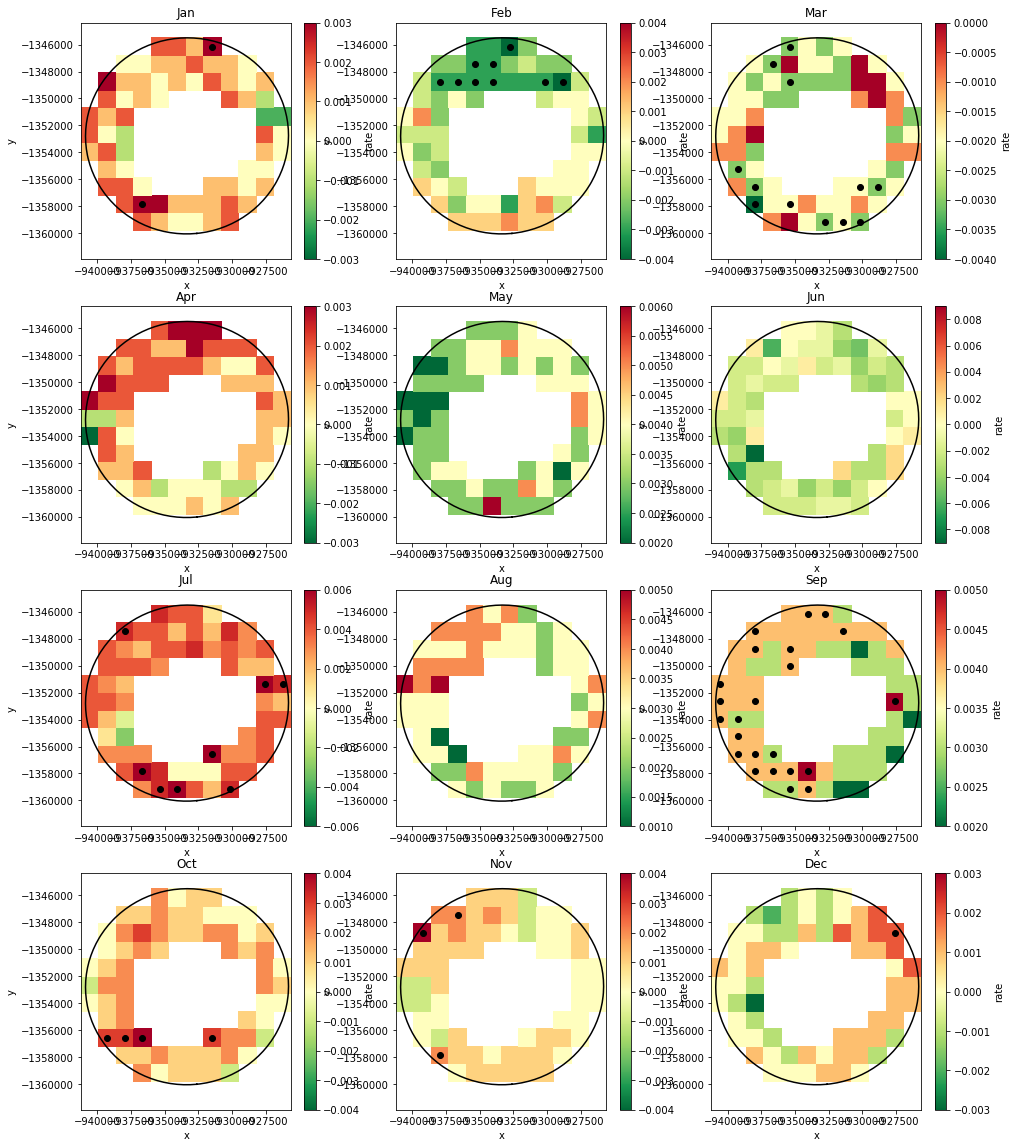

In [127]:
import shapefile as shpf
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
LH = shpf.Reader(poly_path)


plt.figure(figsize=(16,20))

plt.subplot(4,3,1)
yearJanRateData['rate'].plot(cmap='RdYlGn_r')
plt.title('Jan')
plt.axis('equal')
#yearwinterRateDF.plot.scatter('y','x',c='pValue')
tempDF = yearJanRateDF[yearJanRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
#pValue = yearwinterRateDF['pValue']
plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')


plt.subplot(4,3,2)
yearFebRateData['rate'].plot(cmap='RdYlGn_r')
plt.title('Feb')
plt.axis('equal')
#yearwinterRateDF.plot.scatter('y','x',c='pValue')
tempDF = yearFebRateDF[yearFebRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
#pValue = yearwinterRateDF['pValue']
plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')


plt.subplot(4,3,3)
yearMarRateData['rate'].plot(cmap='RdYlGn_r')
plt.title('Mar')
plt.axis('equal')
#yearwinterRateDF.plot.scatter('y','x',c='pValue')
tempDF = yearMarRateDF[yearMarRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
#pValue = yearwinterRateDF['pValue']
plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')


plt.subplot(4,3,4)
yearAprRateData['rate'].plot(cmap='RdYlGn_r')
plt.title('Apr')
plt.axis('equal')
#yearwinterRateDF.plot.scatter('y','x',c='pValue')
tempDF = yearAprRateDF[yearAprRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
#pValue = yearwinterRateDF['pValue']
plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')


plt.subplot(4,3,5)
yearMayRateData['rate'].plot(cmap='RdYlGn_r')
plt.title('May')
plt.axis('equal')
#yearwinterRateDF.plot.scatter('y','x',c='pValue')
tempDF = yearMayRateDF[yearMayRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
#pValue = yearwinterRateDF['pValue']
plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')


plt.subplot(4,3,6)
yearJunRateData['rate'].plot(cmap='RdYlGn_r')
plt.title('Jun')
plt.axis('equal')
#yearwinterRateDF.plot.scatter('y','x',c='pValue')
tempDF = yearJunRateDF[yearJunRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
#pValue = yearwinterRateDF['pValue']
plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')


plt.subplot(4,3,7)
yearJulRateData['rate'].plot(cmap='RdYlGn_r')
plt.title('Jul')
plt.axis('equal')
#yearwinterRateDF.plot.scatter('y','x',c='pValue')
tempDF = yearJulRateDF[yearJulRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
#pValue = yearwinterRateDF['pValue']
plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')


plt.subplot(4,3,8)
yearAugRateData['rate'].plot(cmap='RdYlGn_r')
plt.title('Aug')
plt.axis('equal')
#yearwinterRateDF.plot.scatter('y','x',c='pValue')
tempDF = yearAugRateDF[yearAugRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
#pValue = yearwinterRateDF['pValue']
plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')


plt.subplot(4,3,9)
yearSepRateData['rate'].plot(cmap='RdYlGn_r')
plt.title('Sep')
plt.axis('equal')
#yearwinterRateDF.plot.scatter('y','x',c='pValue')
tempDF = yearSepRateDF[yearSepRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
#pValue = yearwinterRateDF['pValue']
plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')


plt.subplot(4,3,10)
yearOctRateData['rate'].plot(cmap='RdYlGn_r')
plt.title('Oct')
plt.axis('equal')
#yearwinterRateDF.plot.scatter('y','x',c='pValue')
tempDF = yearOctRateDF[yearOctRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
#pValue = yearwinterRateDF['pValue']
plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')


plt.subplot(4,3,11)
yearNovRateData['rate'].plot(cmap='RdYlGn_r')
plt.title('Nov')
plt.axis('equal')
#yearwinterRateDF.plot.scatter('y','x',c='pValue')
tempDF = yearNovRateDF[yearNovRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
#pValue = yearwinterRateDF['pValue']
plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')


plt.subplot(4,3,12)
yearDecRateData['rate'].plot(cmap='RdYlGn_r')
plt.title('Dec')
plt.axis('equal')
#yearwinterRateDF.plot.scatter('y','x',c='pValue')
tempDF = yearDecRateDF[yearDecRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
#pValue = yearwinterRateDF['pValue']
plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')


**the same as above, except sharing the X and Y axes**

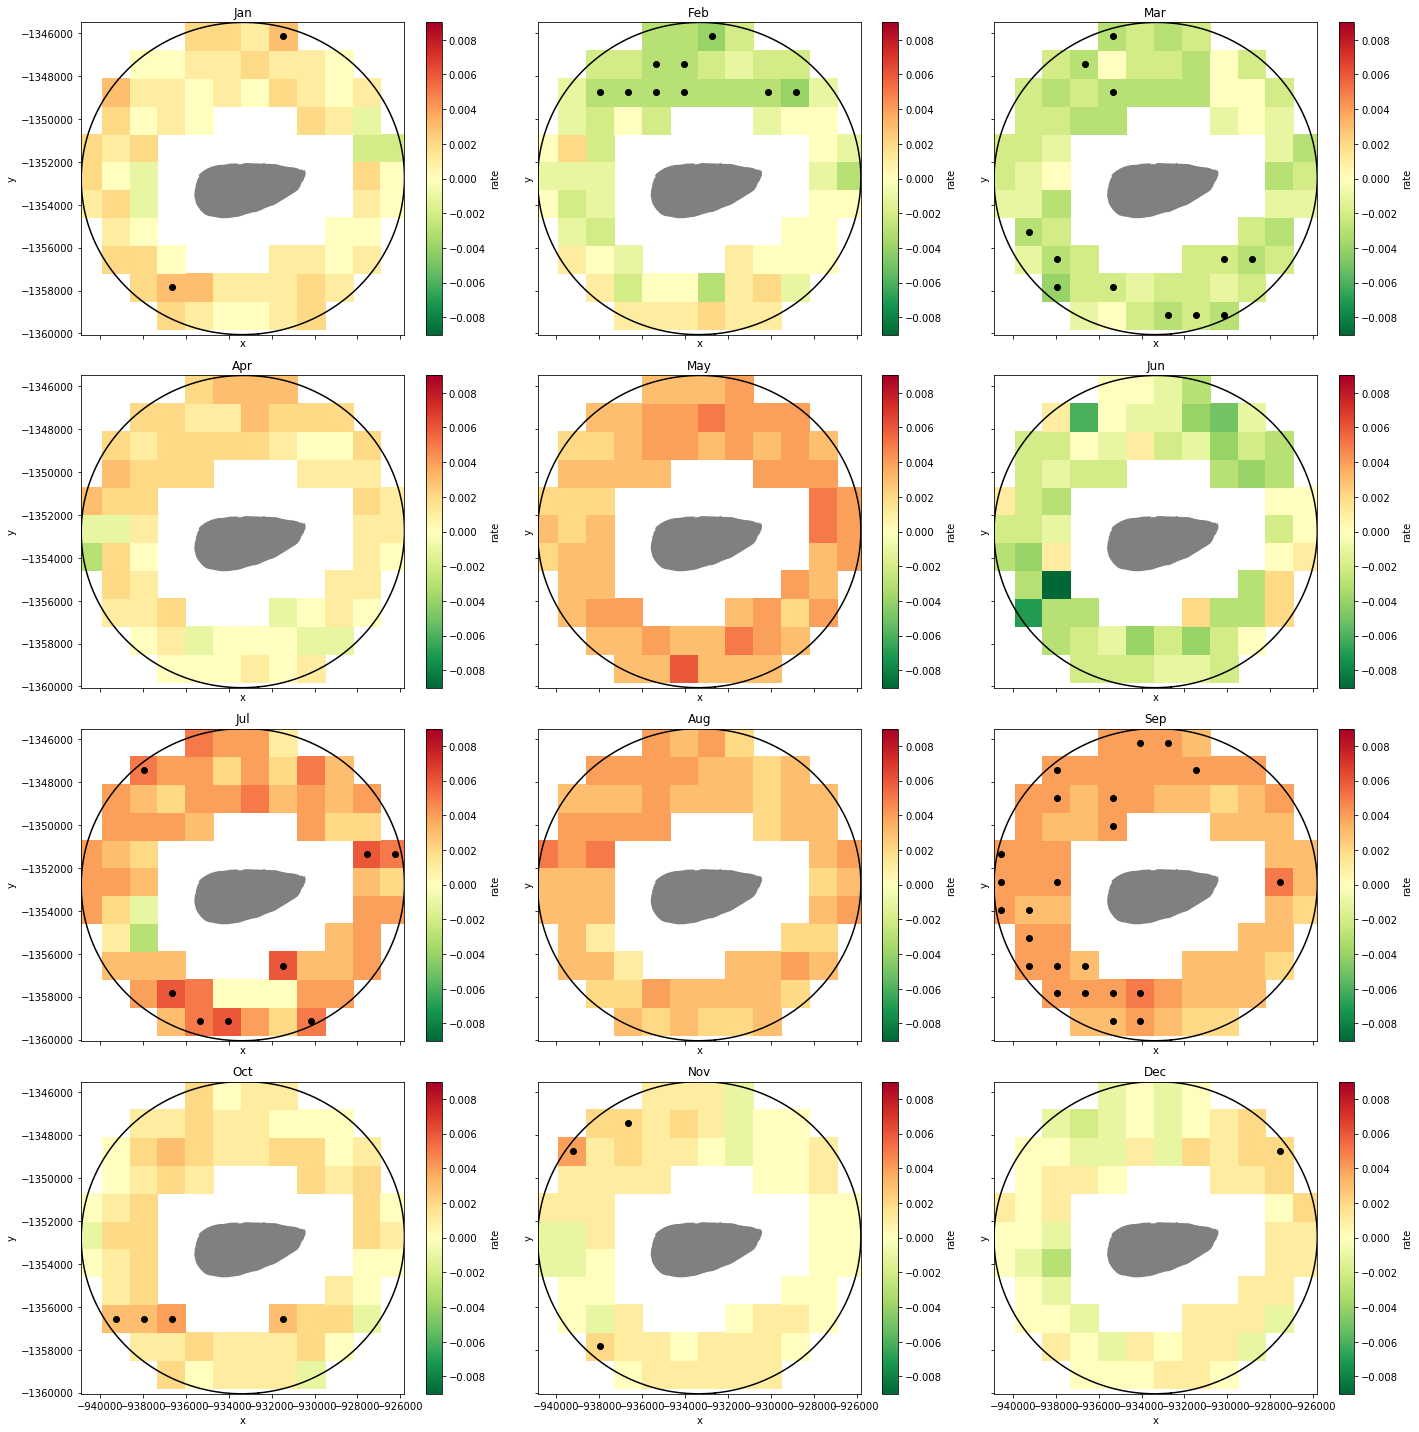

In [131]:
import shapefile as shpf
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
LH = shpf.Reader(poly_path)

x=[yearJanRateData['rate'].min().values,yearFebRateData['rate'].min().values,
  yearMarRateData['rate'].min().values,yearAprRateData['rate'].min().values,
  yearMayRateData['rate'].min().values,yearJunRateData['rate'].min().values,
  yearJulRateData['rate'].min().values,yearAugRateData['rate'].min().values,
  yearSepRateData['rate'].min().values,yearOctRateData['rate'].min().values,
  yearNovRateData['rate'].min().values,yearDecRateData['rate'].min().values]
minV = min(x)
x=[yearJanRateData['rate'].max().values,yearFebRateData['rate'].max().values,
  yearMarRateData['rate'].max().values,yearAprRateData['rate'].max().values,
  yearMayRateData['rate'].max().values,yearJunRateData['rate'].max().values,
  yearJulRateData['rate'].max().values,yearAugRateData['rate'].max().values,
  yearSepRateData['rate'].max().values,yearOctRateData['rate'].max().values,
  yearNovRateData['rate'].max().values,yearDecRateData['rate'].max().values]
maxV = max(x)
if maxV < 0:
    colormap = 'YlGn'
if minV > 0:
    colormap = 'YlGn'
if (minV < 0)&(maxV > 0):
    colormap = 'RdYlGn_r'
    minV = max(abs(minV),maxV) * -1
    maxV = max(abs(minV),maxV)

    
f, axes = plt.subplots(4,3,sharex='all',sharey='all',figsize=(20,20))

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[0,0])
yearJanRateData['rate'].plot(cmap='RdYlGn_r',ax=axes[0,0],vmin=minV,vmax=maxV)
axes[0,0].set_title('Jan')
tempDF = yearJanRateDF[yearJanRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
axes[0,0].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[0,0].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[0,1])
yearFebRateData['rate'].plot(cmap='RdYlGn_r',ax=axes[0,1],vmin=minV,vmax=maxV)
axes[0,1].set_title('Feb')
tempDF = yearFebRateDF[yearFebRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
axes[0,1].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[0,1].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[0,2])
yearMarRateData['rate'].plot(cmap='RdYlGn_r',ax=axes[0,2],vmin=minV,vmax=maxV)
axes[0,2].set_title('Mar')
tempDF = yearMarRateDF[yearMarRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
axes[0,2].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[0,2].plot(x, y, 'k')
    
shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[1,0])
yearAprRateData['rate'].plot(cmap='RdYlGn_r',ax=axes[1,0],vmin=minV,vmax=maxV)
axes[1,0].set_title('Apr')
tempDF = yearAprRateDF[yearAprRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
axes[1,0].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[1,0].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[1,1])
yearMayRateData['rate'].plot(cmap='RdYlGn_r',ax=axes[1,1],vmin=minV,vmax=maxV)
axes[1,1].set_title('May')
tempDF = yearMayRateDF[yearMayRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
axes[1,1].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[1,1].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[1,2])
yearJunRateData['rate'].plot(cmap='RdYlGn_r',ax=axes[1,2],vmin=minV,vmax=maxV)
axes[1,2].set_title('Jun')
tempDF = yearJunRateDF[yearJunRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
axes[1,2].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[1,2].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[2,0])
yearJulRateData['rate'].plot(cmap='RdYlGn_r',ax=axes[2,0],vmin=minV,vmax=maxV)
axes[2,0].set_title('Jul')
tempDF = yearJulRateDF[yearJulRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
axes[2,0].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[2,0].plot(x, y, 'k')
    
shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[2,1])
yearAugRateData['rate'].plot(cmap='RdYlGn_r',ax=axes[2,1],vmin=minV,vmax=maxV)
axes[2,1].set_title('Aug')
tempDF = yearAugRateDF[yearAugRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
axes[2,1].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[2,1].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[2,2])
yearSepRateData['rate'].plot(cmap='RdYlGn_r',ax=axes[2,2],vmin=minV,vmax=maxV)
axes[2,2].set_title('Sep')
tempDF = yearSepRateDF[yearSepRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
axes[2,2].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[2,2].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[3,0])
yearOctRateData['rate'].plot(cmap='RdYlGn_r',ax=axes[3,0],vmin=minV,vmax=maxV)
axes[3,0].set_title('Oct')
tempDF = yearOctRateDF[yearOctRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
axes[3,0].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[3,0].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[3,1])
yearNovRateData['rate'].plot(cmap='RdYlGn_r',ax=axes[3,1],vmin=minV,vmax=maxV)
axes[3,1].set_title('Nov')
tempDF = yearNovRateDF[yearNovRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
axes[3,1].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[3,1].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[3,2])
yearDecRateData['rate'].plot(cmap='RdYlGn_r',ax=axes[3,2],vmin=minV,vmax=maxV)
axes[3,2].set_title('Dec')
tempDF = yearDecRateDF[yearDecRateDF['pValue'] <= 0.1]
x = tempDF['x']
y = tempDF['y']
axes[3,2].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[3,2].plot(x, y, 'k')
    
xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)

axes[0,0].axis([xmin,xmax,ymin,ymax])
f.tight_layout()    
plt.show()

## identify productivity hotspot

**define a function for the identification of productivity hotspot**

In [132]:
def hotspot(statsDF,dataDF):
    ## high productivity threshold is (spatial) mean + 2 * (spatial) std
    # statsDF is a dataframe containing time-series statistics of each cell
    # dataDF is a dataframe containing time-series data for each cell
    a = statsDF['mean'].mean() + 2 * statsDF['mean'].std()
    print(a)
    hotspotDF = pd.DataFrame()
    idList = []
    probList = []
    freqList = []
    for col in dataDF.columns:

        if col.isdigit():
            #print(col)

            nuData = dataDF.index.size - np.isnan(dataDF[col]).sum()
            if nuData > 0:
                idList.append(col)
                # for each cell, calculate the hotspot probability which equals the freqency of high-productivity days out of the total observed days
                prob = (dataDF[col]>a).sum() / nuData 
                probList.append(prob)
                freq = nuData / dataDF.index.size
                freqList.append(freq)
        else:
            break
    hotspotDF['id'] = idList
    hotspotDF['prob'] = probList
    hotspotDF['freq'] = freqList
    hotspotDF.set_index('id',inplace=True)
    xList = []
    yList = []
    for id in hotspotDF.index:
        x = int(latlonDF.loc[id]['lon'])
        y = int(latlonDF.loc[id]['lat'])
        xList.append(x)
        yList.append(y)
    hotspotDF['x'] = xList
    hotspotDF['y'] = yList
    
    return hotspotDF


**identify the overall hotspot**

In [133]:
overallhotspotDF = hotspot(overallDF,chlDF)

0.24061575402081065


In [86]:
overallhotspotDF

,prob,freq,x,y
id,,,,
17,0.374596,0.348407,-935350,-1346150
18,0.377246,0.349372,-934050,-1346150
19,0.378453,0.349533,-932750,-1346150
20,0.381976,0.351786,-931450,-1346150
27,0.371283,0.346315,-937950,-1347450
...,...,...,...,...
137,0.320999,0.347924,-935350,-1359150
138,0.337989,0.345671,-934050,-1359150
139,0.332405,0.346637,-932750,-1359150


In [134]:
import xarray as xr
overallhotspotDF1 = overallhotspotDF.copy()
overallhotspotDF1.set_index(['y','x'],inplace=True)
overallhotspotData = xr.Dataset.from_dataframe(overallhotspotDF1)
overallhotspotData.attrs['crs']='EPSG:3577'
overallhotspotData.to_netcdf(path='/home/547/zxh547/dea-notebooks/overallhotspotData_CHL.nc')

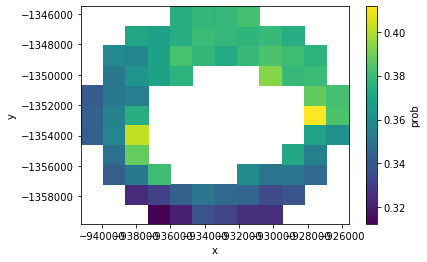

In [135]:
overallhotspotData.prob.plot()

**A hotspot is assessed against the 0.75 threshold value (75% of time with high-productivity)**

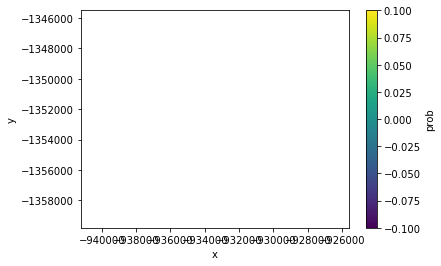

In [136]:
overallhotspotData1 = overallhotspotData.where(overallhotspotData['prob'] >= 0.75)
overallhotspotData1.prob.plot()

**display spatial distribution of overall productivity hotspot; the black dots indicate observation frequency greater than 30%**

<Figure size 720x576 with 0 Axes>

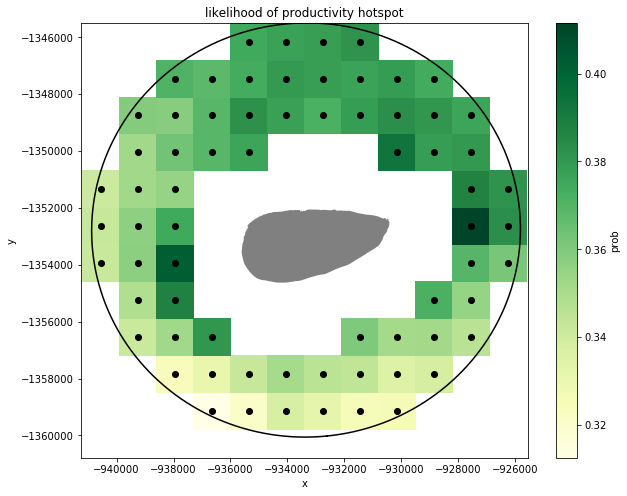

In [147]:
import shapefile as shpf
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
LH = shpf.Reader(poly_path)

fig = plt.figure(figsize=(10,8))
shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',figsize=(10,8))
overallhotspotData['prob'].plot(cmap='YlGn')
plt.title('likelihood of productivity hotspot')
plt.axis('equal')
tempDF = overallhotspotDF[overallhotspotDF['freq'] >= 0.30]
x = tempDF['x']
y = tempDF['y']
plt.scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, 'k')


**identify seasonal hotspots**

In [142]:
tempDF = chlDF[chlDF['season'] == 'winter']
winterhotspotDF = hotspot(winterCHLDF,tempDF)

tempDF = chlDF[chlDF['season'] == 'spring']
springhotspotDF = hotspot(springCHLDF,tempDF)

tempDF = chlDF[chlDF['season'] == 'summer']
summerhotspotDF = hotspot(summerCHLDF,tempDF)

tempDF = chlDF[chlDF['season'] == 'autumn']
autumnhotspotDF = hotspot(autumnCHLDF,tempDF)

0.35465626148748497
0.15054356526115376
0.1269237969517676
0.2000292985751038


In [92]:
autumnhotspotDF

,prob,freq,x,y
id,,,,
17,0.320000,0.367647,-935350,-1346150
18,0.325342,0.373402,-934050,-1346150
19,0.335008,0.381714,-932750,-1346150
20,0.371972,0.369565,-931450,-1346150
27,0.325301,0.371483,-937950,-1347450
...,...,...,...,...
137,0.220690,0.370844,-935350,-1359150
138,0.242268,0.372123,-934050,-1359150
139,0.246528,0.368286,-932750,-1359150


In [143]:
import xarray as xr
winterhotspotDF1 = winterhotspotDF.copy()
winterhotspotDF1.set_index(['y','x'],inplace=True)
winterhotspotData = xr.Dataset.from_dataframe(winterhotspotDF1)
winterhotspotData.attrs['crs']='EPSG:3577'
winterhotspotData.to_netcdf(path='/home/547/zxh547/dea-notebooks/winterhotspotData_CHL.nc')

In [144]:
import xarray as xr
springhotspotDF1 = springhotspotDF.copy()
springhotspotDF1.set_index(['y','x'],inplace=True)
springhotspotData = xr.Dataset.from_dataframe(springhotspotDF1)
springhotspotData.attrs['crs']='EPSG:3577'
springhotspotData.to_netcdf(path='/home/547/zxh547/dea-notebooks/springhotspotData_CHL.nc')

In [145]:
import xarray as xr
summerhotspotDF1 = summerhotspotDF.copy()
summerhotspotDF1.set_index(['y','x'],inplace=True)
summerhotspotData = xr.Dataset.from_dataframe(summerhotspotDF1)
summerhotspotData.attrs['crs']='EPSG:3577'
summerhotspotData.to_netcdf(path='/home/547/zxh547/dea-notebooks/summerhotspotData_CHL.nc')

In [146]:
import xarray as xr
autumnhotspotDF1 = autumnhotspotDF.copy()
autumnhotspotDF1.set_index(['y','x'],inplace=True)
autumnhotspotData = xr.Dataset.from_dataframe(autumnhotspotDF1)
autumnhotspotData.attrs['crs']='EPSG:3577'
autumnhotspotData.to_netcdf(path='/home/547/zxh547/dea-notebooks/autumnhotspotData_CHL.nc')

In [97]:
autumnhotspotDF

,prob,freq,x,y
id,,,,
17,0.320000,0.367647,-935350,-1346150
18,0.325342,0.373402,-934050,-1346150
19,0.335008,0.381714,-932750,-1346150
20,0.371972,0.369565,-931450,-1346150
27,0.325301,0.371483,-937950,-1347450
...,...,...,...,...
137,0.220690,0.370844,-935350,-1359150
138,0.242268,0.372123,-934050,-1359150
139,0.246528,0.368286,-932750,-1359150


**display spatial distributions of the seasonal hotspots; the black dots indicate the observation frequency greater than 30%**

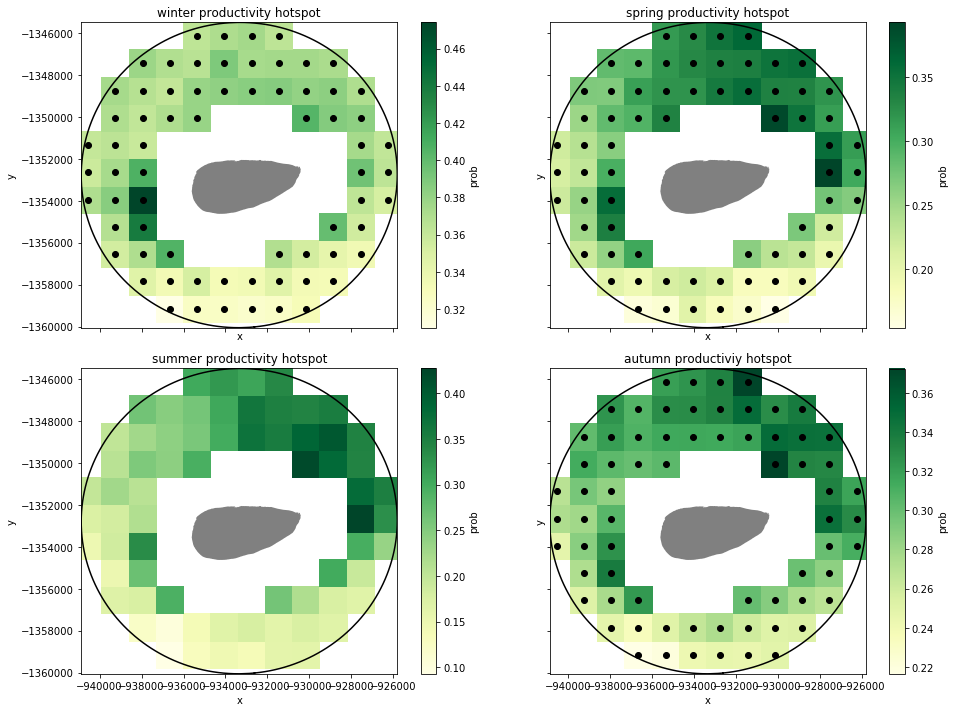

In [177]:
import shapefile as shpf
poly_path = '/home/547/zxh547/dea-notebooks/shapefiles/Cartier_Island.shp'
LH = shpf.Reader(poly_path)


f, axes = plt.subplots(2,2,sharex='all',sharey='all',figsize=(14,10))

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[0,0])

winterhotspotData['prob'].plot(cmap='YlGn',ax=axes[0,0])
axes[0,0].set_title('winter productivity hotspot')
#axes[0,0].axis('equal')

tempDF = winterhotspotDF[winterhotspotDF['freq'] >= 0.3]
x = tempDF['x']
y = tempDF['y']

axes[0,0].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[0,0].plot(x, y, 'k')

shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[0,1])
springhotspotData['prob'].plot(cmap='YlGn',ax=axes[0,1])
axes[0,1].set_title('spring productivity hotspot')
#axes[0,1].axis('equal')

tempDF = springhotspotDF[springhotspotDF['freq'] >= 0.3]
x = tempDF['x']
y = tempDF['y']

axes[0,1].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[0,1].plot(x, y, 'k')
    
shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[1,0])
summerhotspotData['prob'].plot(cmap='YlGn',ax=axes[1,0])
axes[1,0].set_title('summer productivity hotspot')
#axes[1,0].axis('equal')

tempDF = summerhotspotDF[summerhotspotDF['freq'] >= 0.3]
x = tempDF['x']
y = tempDF['y']

axes[1,0].scatter(x,y,c='black')
for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    axes[1,0].plot(x, y, 'k')
    
shape_plot = gpd.read_file(reef_path)
shape_plot.plot(color='gray',ax=axes[1,1])
autumnhotspotData['prob'].plot(cmap='YlGn',ax=axes[1,1])
axes[1,1].set_title('autumn productiviy hotspot')
#axes[1,1].axis('equal')

tempDF = autumnhotspotDF[autumnhotspotDF['freq'] >= 0.3]
x = tempDF['x']
y = tempDF['y']
axes[1,1].scatter(x,y,c='black')

for shape in LH.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]    
    axes[1,1].plot(x, y, 'k')

xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)

axes[0,0].axis([xmin,xmax,ymin,ymax])
f.tight_layout()    
plt.show()

**identify daily hotspots**

In [149]:
a = overallDF['mean'].mean() + 2 * overallDF['mean'].std()
print(a)
dailyhotspotDF = pd.DataFrame()
hotspotList = []
observedList = []
propList = []
dates = []
for i in chlDF.index:
    dates.append(i)
    hotspot = (chlDF.loc[i]['1':'156'] > a).sum()
    observed = (chlDF.loc[i]['1':'156'] > 0).sum()
    if observed > 0:
        prop = hotspot/observed

    else:
        prop = np.nan
    hotspotList.append(hotspot)
    observedList.append(observed)
    propList.append(prop)
dailyhotspotDF['date'] =dates
dailyhotspotDF['hotspot'] = hotspotList
dailyhotspotDF['observed'] = observedList
dailyhotspotDF['prop'] = propList
dailyhotspotDF.set_index('date',inplace=True)

0.24061575402081065


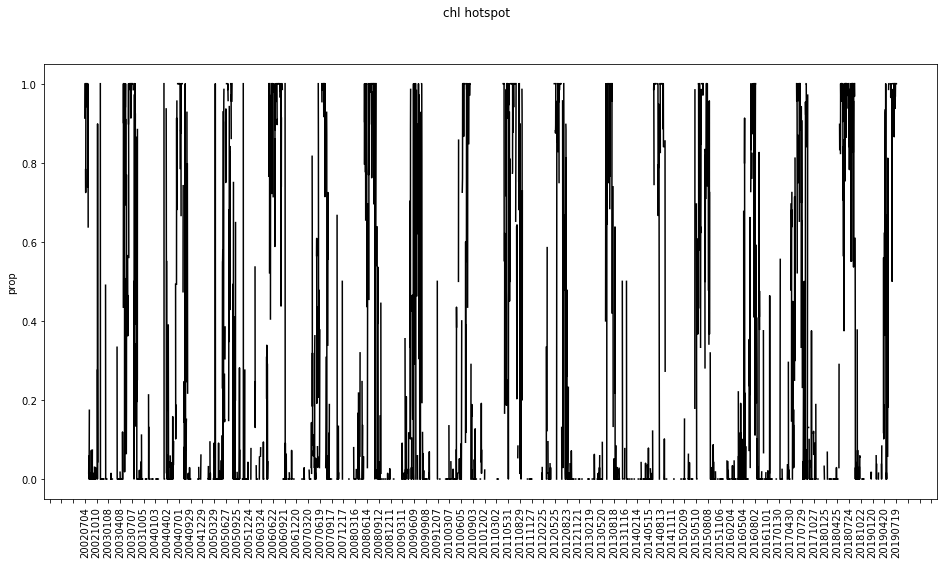

In [150]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(16,8))
plt.xticks(rotation='vertical')

ax.plot(dailyhotspotDF.index.values,dailyhotspotDF['prop'].values,color='black')
ax.xaxis.set_major_locator(ticker.MultipleLocator(90))
ax.set_ylabel('prop')
fig.suptitle('chl hotspot')

plt.show()

In [100]:
dailyhotspotDF

,hotspot,observed,prop
date,,,
20020704,63,69,0.913043
20020705,69,69,1.000000
20020706,69,69,1.000000
20020707,0,0,NaN
20020708,68,69,0.985507
...,...,...,...
20190718,69,69,1.000000
20190719,69,69,1.000000
20190720,1,1,1.000000


In [151]:
dailyhotspotDF['year'] = chlDF['year']
dailyhotspotDF['season'] = chlDF['season']
dailyhotspotDF['month'] = chlDF['month']

**hotspot time-series of annual statistics (e.g., mean, std, etc)**

In [152]:
x = dailyhotspotDF['prop'].groupby(dailyhotspotDF['year'])

yearHotspotDF = x.describe()

yearHotspotDF1 = yearHotspotDF.loc['2003':'2018']

In [103]:
yearHotspotDF1

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2003,182.0,0.346963,0.424958,0.0,0.0,0.025000,0.877060,1.0
2004,180.0,0.282191,0.388499,0.0,0.0,0.037386,0.603339,1.0
2005,184.0,0.274920,0.376576,0.0,0.0,0.036129,0.557971,1.0
2006,166.0,0.435104,0.449399,0.0,0.0,0.170290,0.980258,1.0
2007,169.0,0.246493,0.360941,0.0,0.0,0.029412,0.393939,1.0
2008,180.0,0.384099,0.435005,0.0,0.0,0.070802,0.962766,1.0
2009,174.0,0.216803,0.346601,0.0,0.0,0.000000,0.330645,1.0
2010,162.0,0.255417,0.381762,0.0,0.0,0.014493,0.434783,1.0
2011,153.0,0.503914,0.425737,0.0,0.0,0.594203,1.000000,1.0


**plot and fit the hotspot time-series of annual mean**

/g/data/v10/public/modules/dea-env/20191127/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/g/data/v10/public/modules/dea-env/20191127/lib/python3.6/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/g/data/v10/public/modules/dea-env/20191127/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.071
Method:                 Least Squares   F-statistic:                  0.001647
Date:                Tue, 24 Mar 2020   Prob (F-statistic):              0.968
Time:                        16:46:08   Log-Likelihood:                 16.578
No. Observations:                  16   AIC:                            -29.16
Df Residuals:                      14   BIC:                            -27.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3164      0.048      6.574      0.0

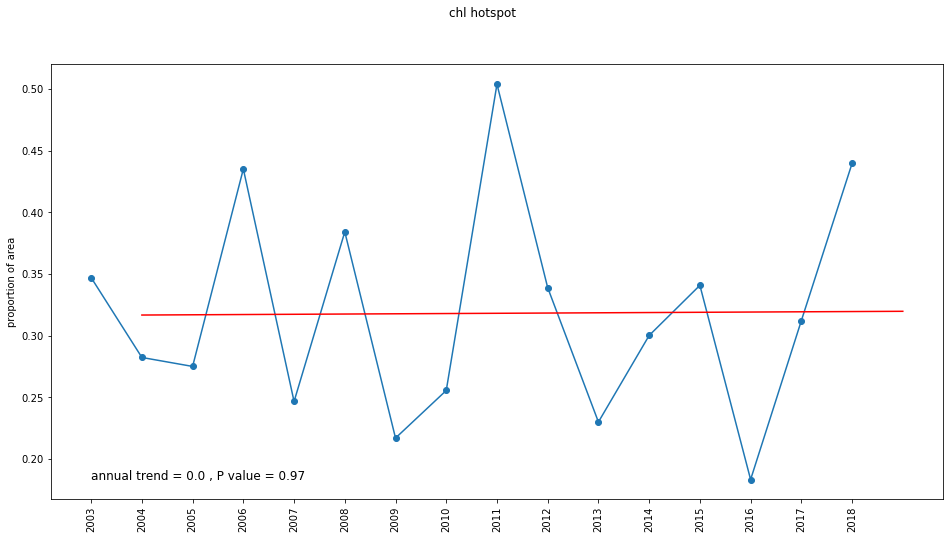

In [153]:
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.formula.api as sm
ind = np.arange(1,yearHotspotDF1['mean'].size+1,1)
yearHotspotDF1['ind'] = ind

meanFit = sm.ols(formula='mean ~ ind', data=yearHotspotDF1).fit()
print(meanFit.summary())

predict = meanFit.predict(yearHotspotDF1)
yearHotspotDF1['mean_fitted'] = predict


fig, ax = plt.subplots(figsize=(16,8))
plt.xticks(rotation='vertical')

rate = round(meanFit.params[1],3)
pValue = round(meanFit.pvalues[1],2)


textX = yearHotspotDF1.index[0]
textY = yearHotspotDF1['mean'].min()
text = "annual trend = " + str(rate) + " , P value = " + str(pValue)
plt.text(textX,textY,text,fontsize=12)
ax.plot(yearHotspotDF1.index.values,yearHotspotDF1['mean'].values,marker='o')


#ax.xaxis.set_major_locator(ticker.MultipleLocator(90))
ax.plot(yearHotspotDF1.ind, yearHotspotDF1.mean_fitted, 'r')
ax.set_ylabel('proportion of area')
fig.suptitle('chl hotspot')

plt.show()

**hotspot's seasonal statistics**

In [154]:
x = dailyhotspotDF['prop'].groupby(dailyhotspotDF['season'])
seasonHotspotDF = x.describe()

In [155]:
seasonHotspotDF

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
autumn,798.0,0.198083,0.327485,0.0,0.000000,0.014599,0.228162,1.0
spring,752.0,0.078458,0.211574,0.0,0.000000,0.000000,0.023256,1.0
summer,369.0,0.037409,0.146226,0.0,0.000000,0.000000,0.000000,1.0
winter,1073.0,0.683326,0.375046,0.0,0.376812,0.875000,1.000000,1.0


In [156]:
numDays = []
for season in seasonHotspotDF.index:
    print(season)
    numDay = (dailyhotspotDF['season'] == season).sum()
    numDays.append(numDay)
seasonHotspotDF['numDay'] = numDays
seasonHotspotDF['freq'] = seasonHotspotDF['count'] / seasonHotspotDF['numDay']

autumn
spring
summer
winter


**plot the hotspot's seasonal means and observation frequency**

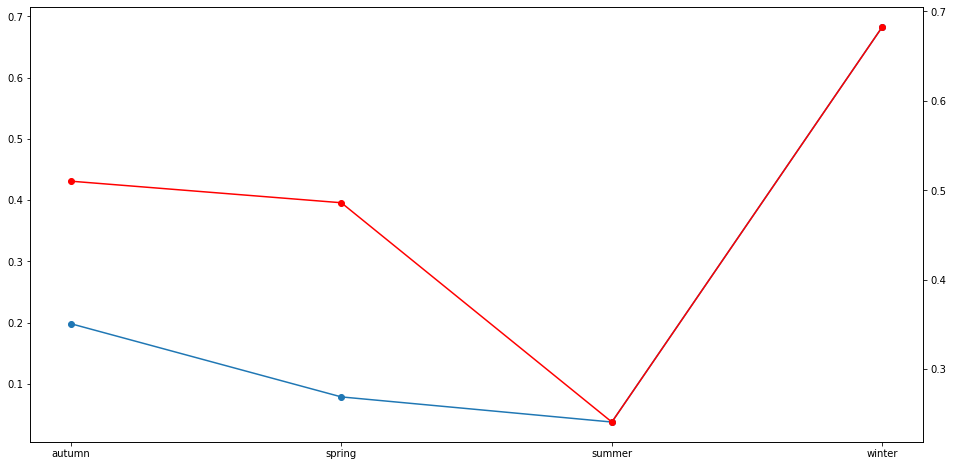

In [157]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax1.plot(seasonHotspotDF.index,seasonHotspotDF['mean'],marker='o')
ax2.plot(seasonHotspotDF.index,seasonHotspotDF['freq'],color='red',marker='o')

**hotspot's monthly statistics**

In [158]:
x = dailyhotspotDF['prop'].groupby(dailyhotspotDF['month'])
monthHotspotDF = x.describe()

In [159]:
monthHotspotDF

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
01,105.0,0.041921,0.173602,0.0,0.000000,0.000000,0.000000,1.000000
02,140.0,0.043797,0.153006,0.0,0.000000,0.000000,0.000000,1.000000
03,196.0,0.065358,0.181953,0.0,0.000000,0.000000,0.040000,1.000000
04,285.0,0.106996,0.248725,0.0,0.000000,0.000000,0.057971,1.000000
05,317.0,0.362038,0.386118,0.0,0.000000,0.173913,0.753623,1.000000
06,339.0,0.702691,0.345452,0.0,0.471429,0.855072,1.000000,1.000000
07,364.0,0.849181,0.253542,0.0,0.822193,0.984111,1.000000,1.000000
08,370.0,0.502416,0.419273,0.0,0.047704,0.503623,0.996377,1.000000
09,314.0,0.133113,0.276208,0.0,0.000000,0.000000,0.084393,1.000000


In [160]:
numDays = []
for month in monthHotspotDF.index:
    print(month)
    numDay = (dailyhotspotDF['month'] == month).sum()
    numDays.append(numDay)
monthHotspotDF['numDay'] = numDays
monthHotspotDF['freq'] = monthHotspotDF['count'] / monthHotspotDF['numDay']

01
02
03
04
05
06
07
08
09
10
11
12


**plot hotspot's monthly mean and observation frequency**

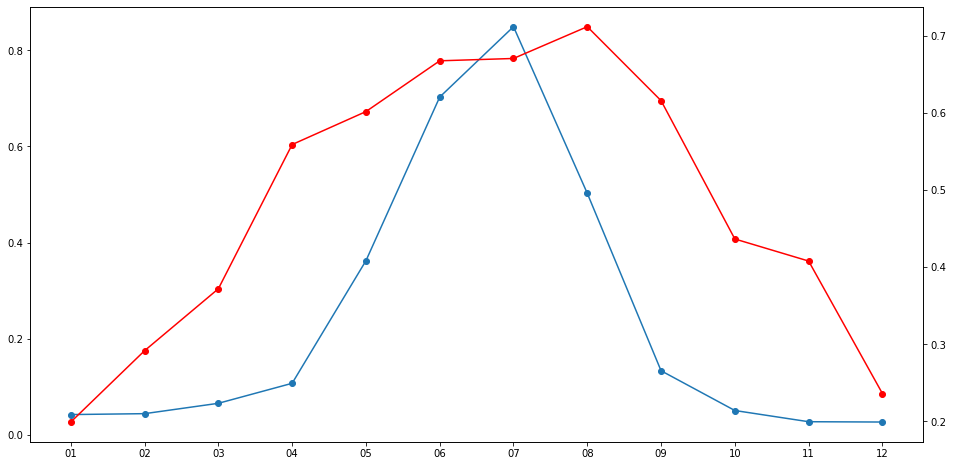

In [161]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax1.plot(monthHotspotDF.index,monthHotspotDF['mean'],marker='o')
ax2.plot(monthHotspotDF.index,monthHotspotDF['freq'],color='red',marker='o')

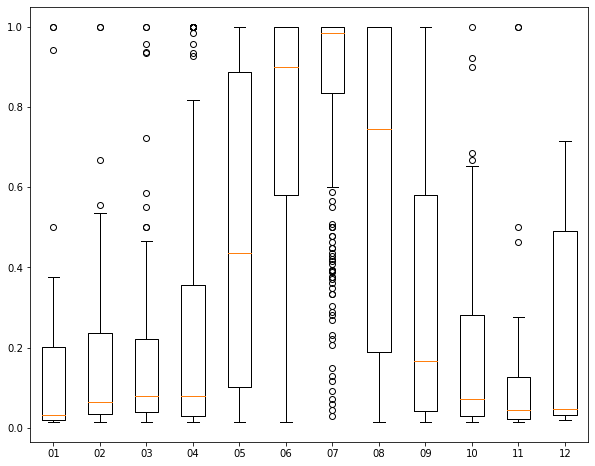

In [162]:
boxplotData = []
monthList = []
months = dailyhotspotDF['month'].unique()
months.sort()
for month in months:
    
    x = dailyhotspotDF[dailyhotspotDF['month'] == month]
    y = x[x['prop']>0]['prop']
    monthList.append(month)

    boxplotData.append(y)

fig = plt.figure(figsize=(10,8))

plt.boxplot(boxplotData,labels=monthList)
plt.show()

In [114]:
dailyhotspotDF.head(10)

,hotspot,observed,prop,year,season,month
date,,,,,,
20020704,63,69,0.913043,2002,winter,07
20020705,69,69,1.000000,2002,winter,07
20020706,69,69,1.000000,2002,winter,07
20020707,0,0,NaN,2002,winter,07
20020708,68,69,0.985507,2002,winter,07
20020709,0,0,NaN,2002,winter,07
20020710,54,69,0.782609,2002,winter,07
20020711,50,69,0.724638,2002,winter,07
20020712,64,69,0.927536,2002,winter,07
